# Proyek Klasifikasi Gambar: Landscape Classification
- **Nama:** Fikri Dean Radityo
- **Email:** fikrideanradityo@gmail.com
- **ID Dicoding:** fikridean11

In [ ]:
%pip install gdown

In [ ]:
import gdown
import os
import shutil
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import Callback
import pathlib

Terdapat 2 Dataset yang digunakan (Dijumlahkan)

1. Landscape Recognition Image Dataset (https://www.kaggle.com/datasets/utkarshsaxenadn/landscape-recognition-image-dataset-12k-images)

2. Intel Image Classification (https://www.kaggle.com/datasets/puneet6060/intel-image-classification/data)

---

Dataset yang diunduh, telah digabungkan secara manual. Kemudian diunggah ke Google Drive (https://drive.google.com/file/d/1GBa-gOjBfQSdVHlATAA9970ARDeCMl91/view?usp=sharing)

---

Kelas yang diambil dari dataset:

1. Forest
2. Glacier
3. Mountain

---

Kelas-kelas tersebut dipilih dari seluruh kelas yang ada di dataset dikarenakan hanya ketiga kelas tersebut yang tersedia pada kedua dataset. Selain itu, untuk kebutuhan jumlah total dataset yang dibutuhkan untuk memenuhi syarat (saran nomor 3).

In [ ]:
dataset_file_id = "1KxewtRCATDh_x6ijFonqDf0z2-acLw7q"
destination = "/content/dataset.zip"
gdown.download(f"https://drive.google.com/uc?id={dataset_file_id}", destination, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1KxewtRCATDh_x6ijFonqDf0z2-acLw7q
From (redirected): https://drive.google.com/uc?id=1KxewtRCATDh_x6ijFonqDf0z2-acLw7q&confirm=t&uuid=05586e28-716e-4ff4-a517-ce9d4ec8a860
To: /content/dataset.zip
100%|██████████| 197M/197M [00:04<00:00, 40.3MB/s]


'/content/dataset.zip'

In [ ]:
!unzip /content/dataset.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/mountain/mountain (1).jpeg  
  inflating: /content/dataset/mountain/mountain (1).jpg  
  inflating: /content/dataset/mountain/mountain (10).jpeg  
  inflating: /content/dataset/mountain/mountain (10).jpg  
  inflating: /content/dataset/mountain/mountain (100).jpeg  
  inflating: /content/dataset/mountain/mountain (100).jpg  
  inflating: /content/dataset/mountain/mountain (1000).jpeg  
  inflating: /content/dataset/mountain/mountain (1000).jpg  
  inflating: /content/dataset/mountain/mountain (1001).jpeg  
  inflating: /content/dataset/mountain/mountain (1001).jpg  
  inflating: /content/dataset/mountain/mountain (1002).jpeg  
  inflating: /content/dataset/mountain/mountain (1002).jpg  
  inflating: /content/dataset/mountain/mountain (1003).jpeg  
  inflating: /content/dataset/mountain/mountain (1003).jpg  
  inflating: /content/dataset/mountain/mountain (1004).jpeg  
  inflating: /content/dataset/mountain

glacier: 5000 images
forest: 5000 images
mountain: 5000 images

Total dataset: 15000


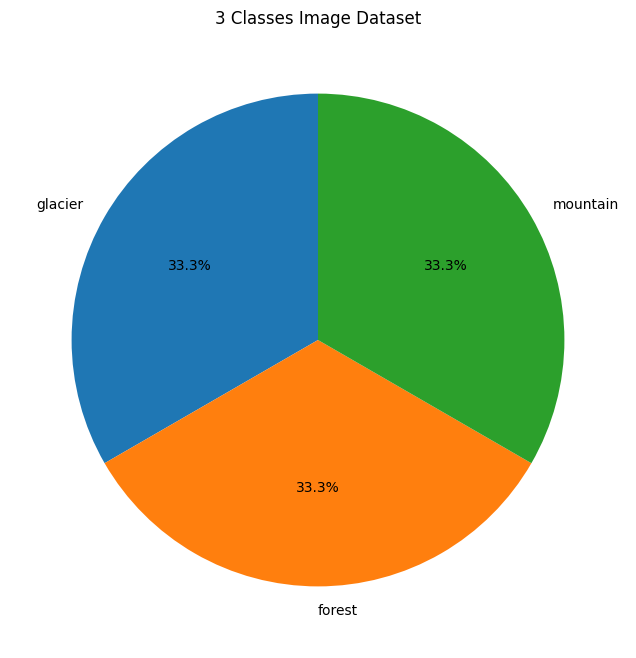

In [ ]:
dataset_folder = '/content/dataset'
image_extensions = ('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')
image_counts = {}
total = 0

for folder in os.listdir(dataset_folder):
    folder_path = os.path.join(dataset_folder, folder)

    if os.path.isdir(folder_path):
        count = 0

        for file in os.listdir(folder_path):
            if file.lower().endswith(image_extensions):
                count += 1
        image_counts[folder] = count

for folder, count in image_counts.items():
    print(f"{folder}: {count} images")
    total += count

print(f"\nTotal dataset: {total}")

labels = list(image_counts.keys())
image_counts_num = list(image_counts.values())

plt.figure(figsize=(8, 8))
plt.pie(image_counts_num, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('3 Classes Image Dataset')

plt.show()

Berdasarkan kode diatas:

**Memenuhi Saran ke-3** >> Dataset yang digunakan berisi lebih dari 10000 gambar

**Memenuhi Saran ke-5** >> Memiliki 3 buah kelas atau lebih

In [ ]:
dataset_folder = '/content/dataset'

def print_images_resolution(directory):
    unique_sizes = set()
    total_images = 0

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        image_files = os.listdir(subdir_path)
        num_images = len(image_files)
        print(f"{subdir}: {num_images}")
        total_images += num_images

        for img_file in image_files:
            img_path = os.path.join(subdir_path, img_file)
            with Image.open(img_path) as img:
                unique_sizes.add(img.size)

        for size in unique_sizes:
            print(f"- {size}")
        print("---------------")

    print(f"\nTotal: {total_images}")

print_images_resolution(dataset_folder)

glacier: 5000
- (322, 157)
- (410, 123)
- (413, 122)
- (176, 286)
- (178, 283)
- (206, 244)
- (204, 247)
- (225, 224)
- (407, 124)
- (188, 269)
- (190, 266)
- (328, 154)
- (363, 139)
- (200, 252)
- (201, 251)
- (203, 248)
- (150, 123)
- (314, 161)
- (392, 129)
- (186, 271)
- (187, 270)
- (168, 299)
- (189, 267)
- (276, 183)
- (150, 150)
- (324, 156)
- (297, 169)
- (152, 330)
- (337, 150)
- (259, 194)
- (185, 272)
- (331, 152)
- (334, 151)
- (280, 180)
- (266, 190)
- (197, 255)
- (267, 189)
- (272, 185)
- (258, 195)
- (287, 176)
- (292, 172)
- (247, 204)
- (278, 182)
- (371, 136)
- (279, 181)
- (150, 143)
- (284, 177)
- (173, 291)
- (265, 191)
- (270, 187)
- (150, 335)
- (299, 168)
- (256, 197)
- (343, 147)
- (262, 192)
- (290, 174)
- (291, 173)
- (246, 205)
- (397, 127)
- (251, 201)
- (306, 164)
- (309, 163)
- (349, 144)
- (250, 175)
- (269, 188)
- (298, 169)
- (301, 168)
- (150, 72)
- (260, 194)
- (181, 279)
- (289, 175)
- (249, 203)
- (250, 202)
- (233, 216)
- (193, 262)
- (308, 164)

Berdasarkan kode diatas:

**Memenuhi Saran ke-2** >> Gambar-gambar pada dataset memiliki resolusi yang tidak seragam

Pembagian dataset ke folder train (80%) dan val (20%)



In [ ]:
folder_path = 'dataset'
folders = ['forest', 'glacier', 'mountain']

for i in folders:
  if not os.path.exists(folder_path + '/train/' + i):
    os.makedirs(folder_path + '/train/' + i)

  if not os.path.exists(folder_path + '/val/' + i):
    os.makedirs(folder_path + '/val/' + i)

  all_images = os.listdir(folder_path + '/' + i)
  np.random.shuffle(all_images)

  validation_ratio = 0.2
  train_images, validation_images = np.split(np.array(all_images), [math.ceil(float((len(all_images) * (1 - validation_ratio))))])

  train_images = [folder_path + '/' + i + '/' + picture for picture in train_images.tolist()]
  validation_images = [folder_path + '/' + i + '/' + picture for picture in validation_images.tolist()]

  for images in train_images:
    shutil.copy(images, folder_path + '/train/' + i)
  for images in validation_images:
    shutil.copy(images, folder_path + '/val/' + i)

Penghitungan jumlah images yang ada di folder train

In [ ]:
dataset_folder = '/content/dataset/train'
image_extensions = ('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')
image_counts = {}
total = 0

for folder in os.listdir(dataset_folder):
    folder_path = os.path.join(dataset_folder, folder)

    if os.path.isdir(folder_path):
        count = 0

        for file in os.listdir(folder_path):
            if file.lower().endswith(image_extensions):
                count += 1
        image_counts[folder] = count

for folder, count in image_counts.items():
    print(f"{folder}: {count} images")
    total += count

print(f"\nTotal images pada folder train: {total}")

glacier: 4000 images
forest: 4000 images
mountain: 4000 images

Total images pada folder train: 12000


Penghitungan jumlah images yang ada di folder val

In [ ]:
dataset_folder = '/content/dataset/val'
image_extensions = ('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')
image_counts = {}
total = 0

for folder in os.listdir(dataset_folder):
    folder_path = os.path.join(dataset_folder, folder)

    if os.path.isdir(folder_path):
        count = 0

        for file in os.listdir(folder_path):
            if file.lower().endswith(image_extensions):
                count += 1
        image_counts[folder] = count

for folder, count in image_counts.items():
    print(f"{folder}: {count} images")
    total += count

print(f"\nTotal images pada folder val: {total}")

glacier: 1000 images
forest: 1000 images
mountain: 1000 images

Total images pada folder val: 3000


In [ ]:
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.01,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_data_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_gen = train_data_gen.flow_from_directory(
    '/content/dataset/train',
    target_size = (150, 150),
    batch_size = 64,
    shuffle = True,
    class_mode = 'categorical')

val_gen = test_data_gen.flow_from_directory(
    '/content/dataset/val',
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical')

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [ ]:
model = Sequential([
    Conv2D(128, (3, 3), use_bias = True, padding = 'same', strides=1, input_shape = (150, 150, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Conv2D(256, (3, 3), use_bias = True, padding = 'same', strides=1),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Conv2D(512, (3, 3), use_bias = True, padding = 'same', strides=1),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Conv2D(1024, (3, 3), use_bias = True, padding = 'same', strides=1),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Flatten(),
    Dropout(0.5),
    Dense(1024, activation = 'relu'),
    Dense(512, activation = 'relu'),
    Dense(3, activation = 'softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 150, 150, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 75, 75, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 37, 37, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 37, 37, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 37, 37, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 18, 18, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 1024)        │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 18, 18, 1024)        │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 18, 18, 1024)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 91,668,227 (349.69 MB)

 Trainable params: 91,664,387 (349.67 MB)

 Non-trainable params: 3,840 (15.00 KB)

In [ ]:
class ModelAccuracyChecker(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
      print("The model has achieved 95% accuracy and validation accuracy.")
      self.model.stop_training=True

Model_Accuracy_checker_obj = ModelAccuracyChecker()

Berdasarkan kode diatas:

**Memenuhi Saran ke-1** >> Mengimplementasikan Callback

In [ ]:
class AccuracyAndLossPlot(Callback):
    def __init__(self):
        self.epochs = []
        self.accuracy = []
        self.loss = []
        self.val_accuracy = []
        self.val_loss = []

    def on_epoch_end(self, epoch, logs={}):
        self.epochs.append(epoch)
        self.accuracy.append(logs.get('accuracy'))
        self.loss.append(logs.get('loss'))
        self.val_accuracy.append(logs.get('val_accuracy'))
        self.val_loss.append(logs.get('val_loss'))
        self.plot_metrics()

    def plot_metrics(self):
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.plot(self.epochs, self.accuracy, label='Train Accuracy')
        plt.plot(self.epochs, self.val_accuracy, label='Val Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.title('Accuracy per epochs')

        plt.subplot(1, 2, 2)
        plt.plot(self.epochs, self.loss, label='Train Loss')
        plt.plot(self.epochs, self.val_loss, label='Val Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.title('Loss per epochs')

        plt.show()

plot_obj = AccuracyAndLossPlot()

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001, momentum = 0.85),
              metrics=['accuracy'])

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


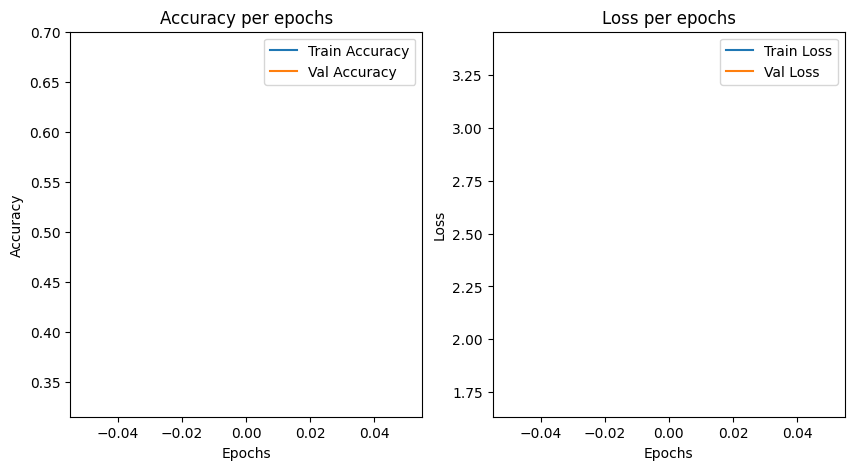

187/187 - 162s - 868ms/step - accuracy: 0.6830 - loss: 3.3718 - val_accuracy: 0.3327 - val_loss: 1.7170
Epoch 2/300


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


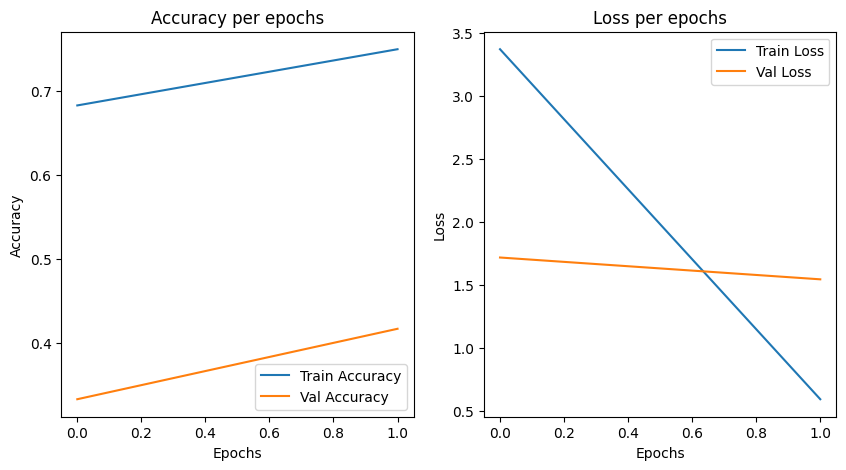

187/187 - 6s - 31ms/step - accuracy: 0.7500 - loss: 0.5911 - val_accuracy: 0.4167 - val_loss: 1.5437
Epoch 3/300


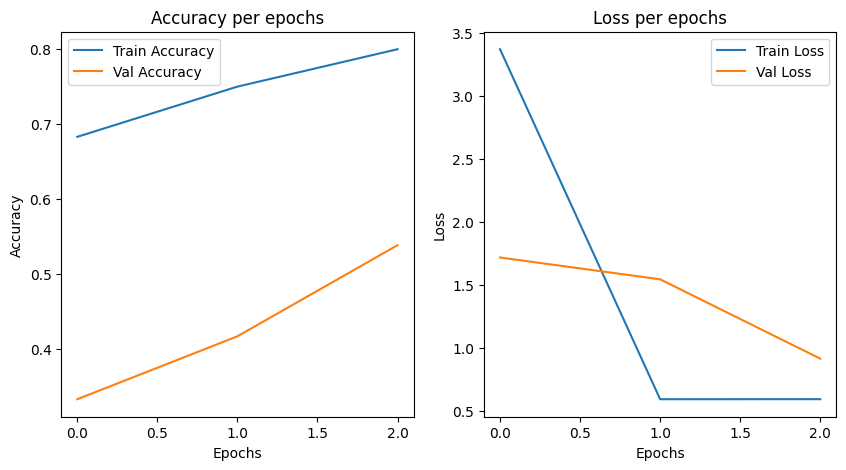

187/187 - 136s - 729ms/step - accuracy: 0.7999 - loss: 0.5914 - val_accuracy: 0.5383 - val_loss: 0.9133
Epoch 4/300


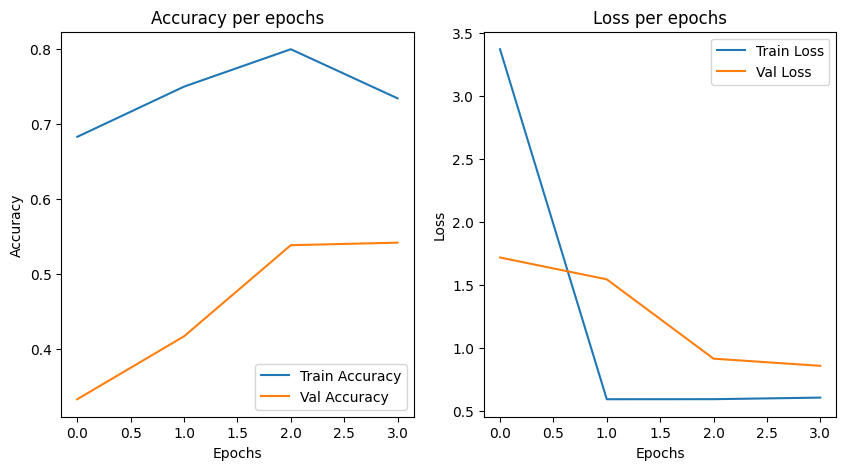

187/187 - 1s - 4ms/step - accuracy: 0.7344 - loss: 0.6039 - val_accuracy: 0.5417 - val_loss: 0.8563
Epoch 5/300


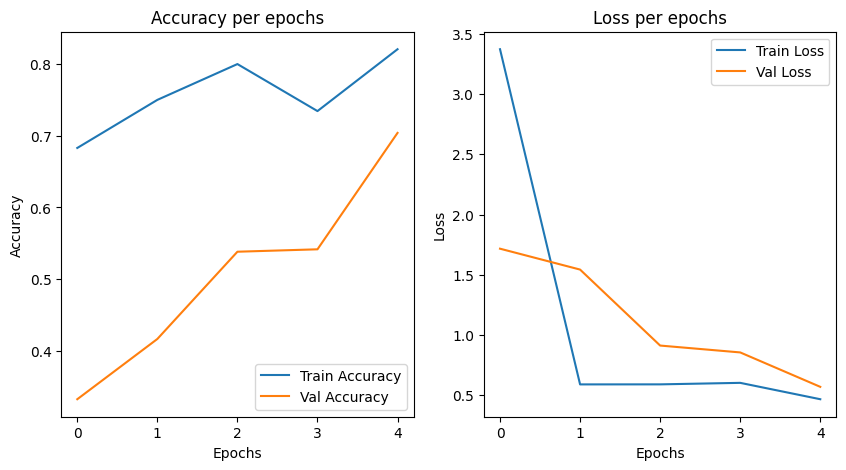

187/187 - 98s - 525ms/step - accuracy: 0.8206 - loss: 0.4681 - val_accuracy: 0.7040 - val_loss: 0.5708
Epoch 6/300


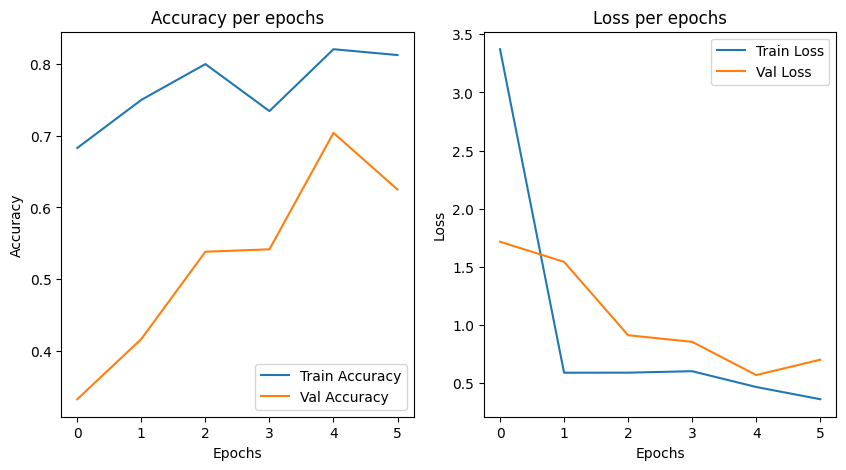

187/187 - 1s - 4ms/step - accuracy: 0.8125 - loss: 0.3631 - val_accuracy: 0.6250 - val_loss: 0.7027
Epoch 7/300


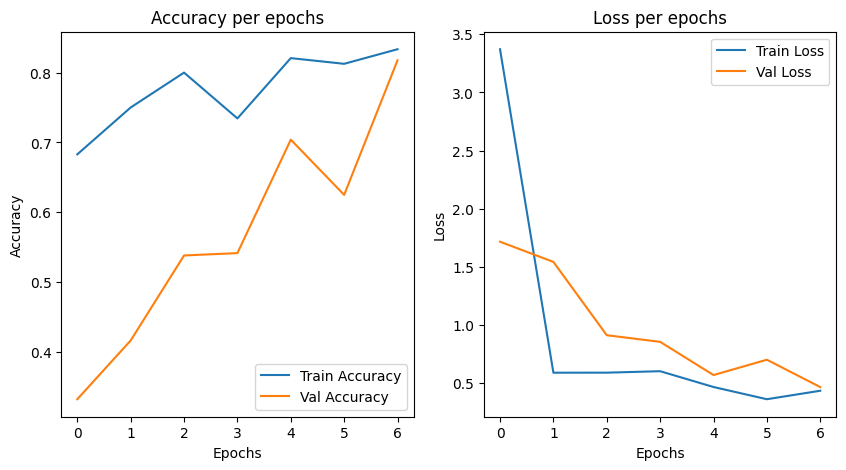

187/187 - 99s - 527ms/step - accuracy: 0.8334 - loss: 0.4359 - val_accuracy: 0.8175 - val_loss: 0.4674
Epoch 8/300


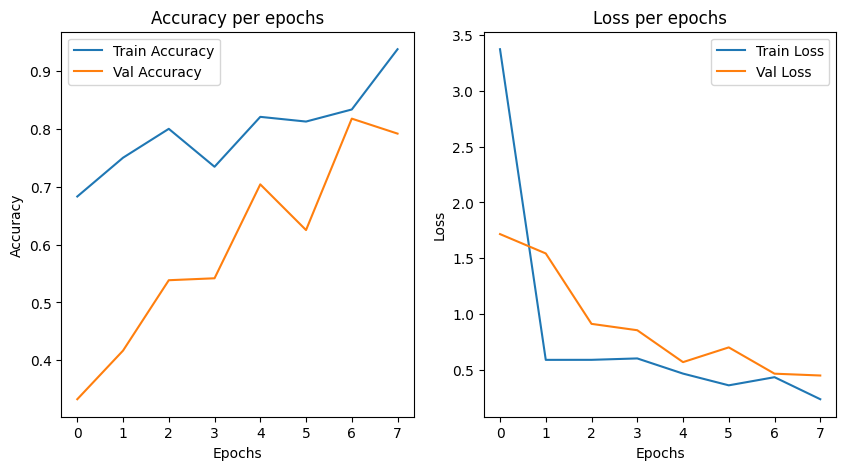

187/187 - 4s - 19ms/step - accuracy: 0.9375 - loss: 0.2387 - val_accuracy: 0.7917 - val_loss: 0.4510
Epoch 9/300


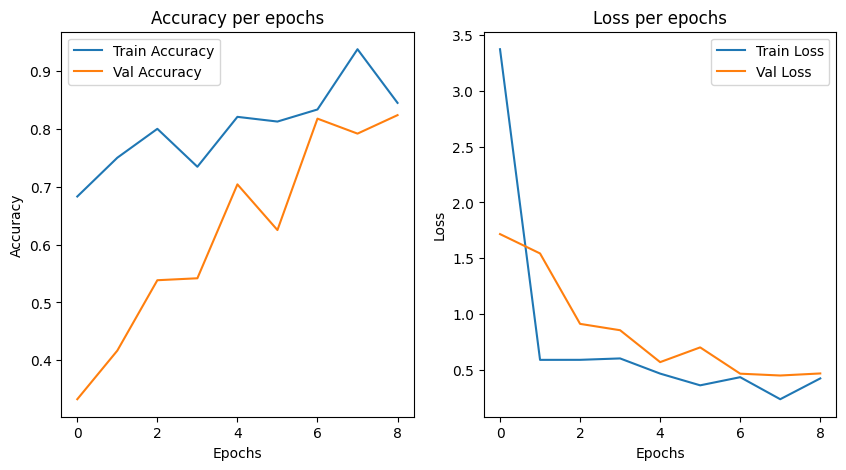

187/187 - 138s - 737ms/step - accuracy: 0.8448 - loss: 0.4250 - val_accuracy: 0.8236 - val_loss: 0.4694
Epoch 10/300


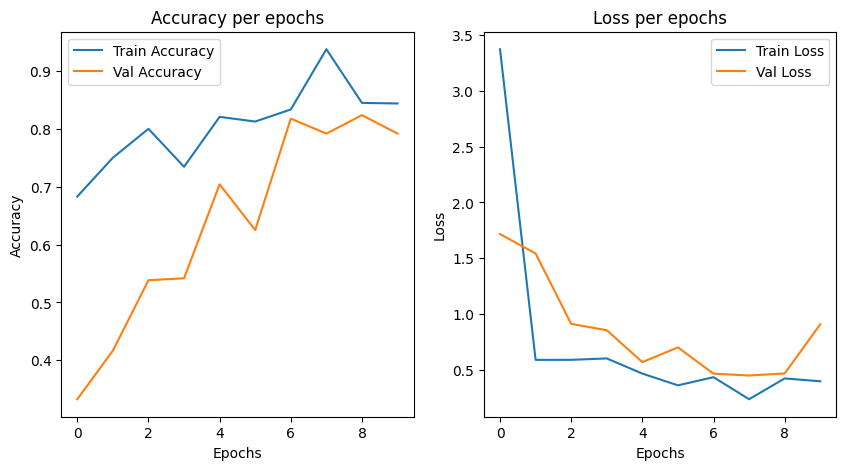

187/187 - 1s - 4ms/step - accuracy: 0.8438 - loss: 0.3993 - val_accuracy: 0.7917 - val_loss: 0.9092
Epoch 11/300


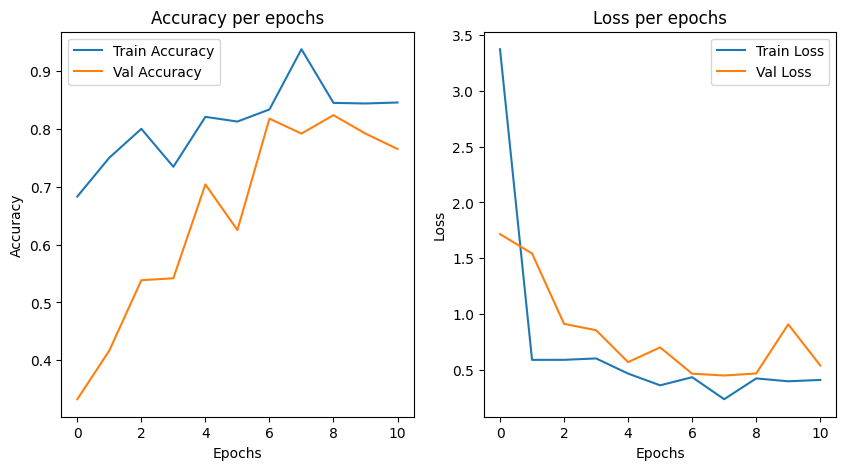

187/187 - 98s - 524ms/step - accuracy: 0.8454 - loss: 0.4115 - val_accuracy: 0.7651 - val_loss: 0.5410
Epoch 12/300


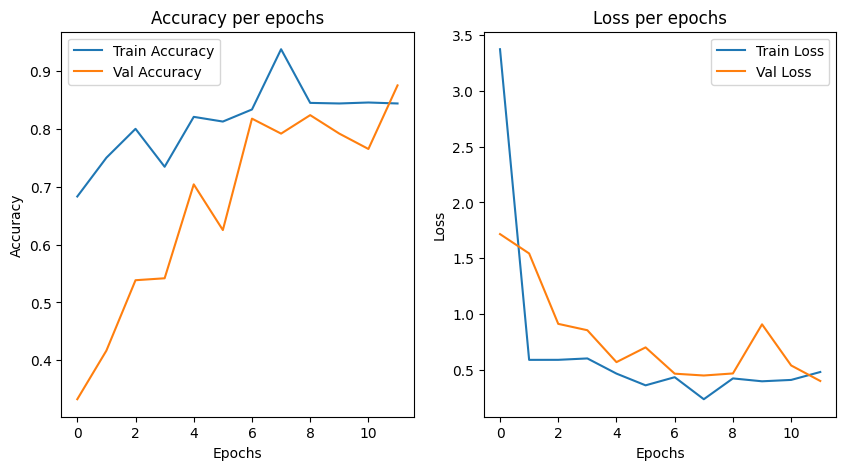

187/187 - 1s - 4ms/step - accuracy: 0.8438 - loss: 0.4824 - val_accuracy: 0.8750 - val_loss: 0.4021
Epoch 13/300


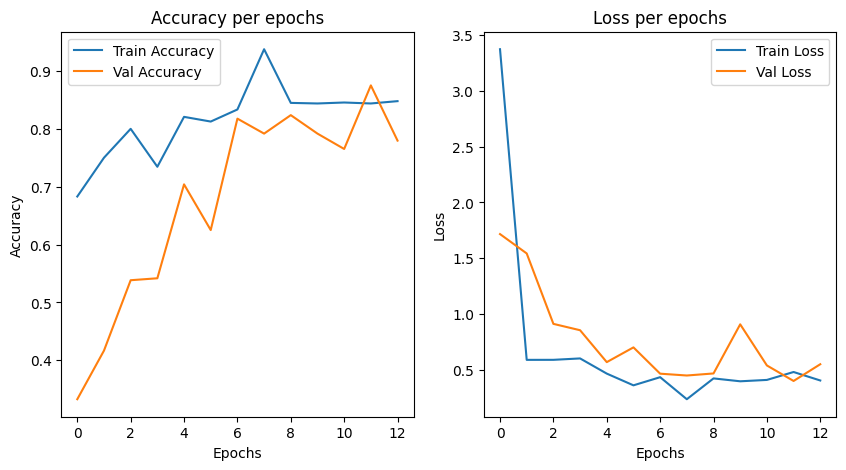

187/187 - 142s - 758ms/step - accuracy: 0.8478 - loss: 0.4065 - val_accuracy: 0.7796 - val_loss: 0.5519
Epoch 14/300


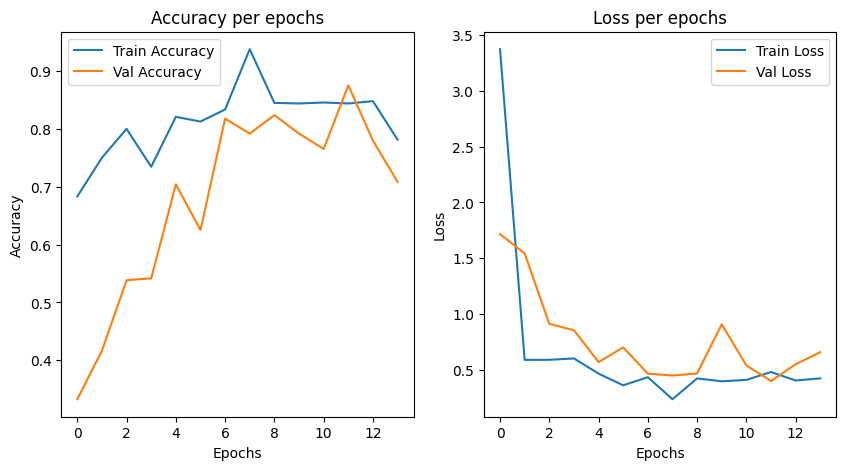

187/187 - 1s - 5ms/step - accuracy: 0.7812 - loss: 0.4253 - val_accuracy: 0.7083 - val_loss: 0.6600
Epoch 15/300


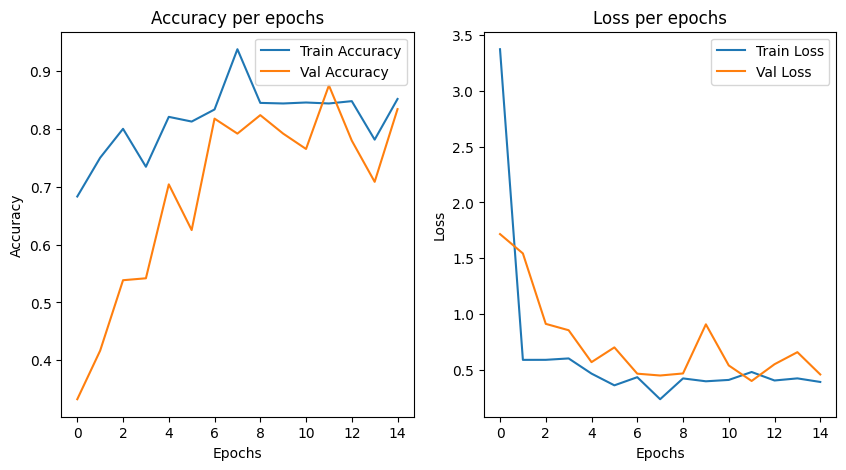

187/187 - 99s - 527ms/step - accuracy: 0.8515 - loss: 0.3933 - val_accuracy: 0.8340 - val_loss: 0.4604
Epoch 16/300


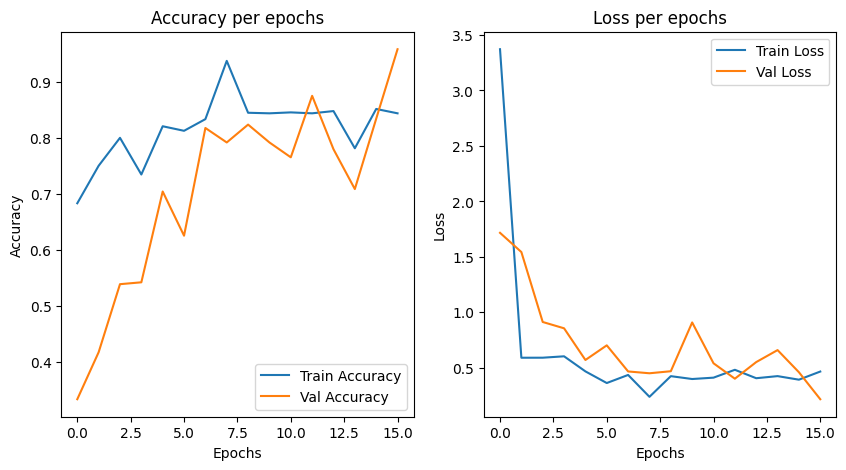

187/187 - 1s - 4ms/step - accuracy: 0.8438 - loss: 0.4666 - val_accuracy: 0.9583 - val_loss: 0.2171
Epoch 17/300


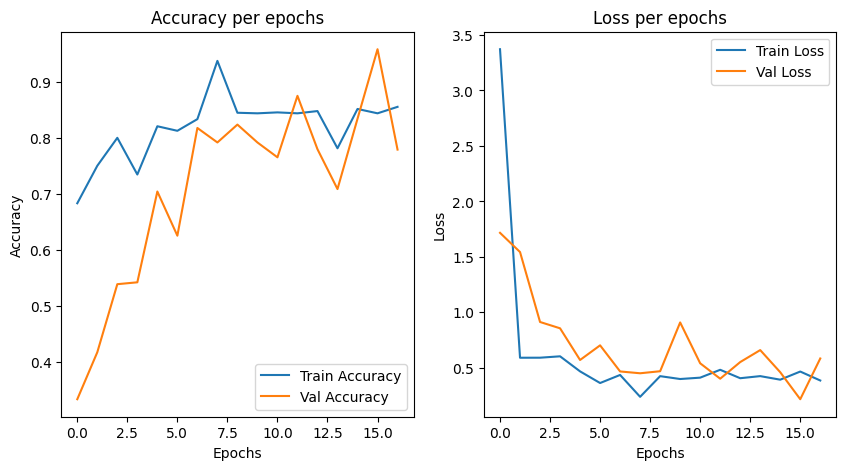

187/187 - 142s - 757ms/step - accuracy: 0.8553 - loss: 0.3859 - val_accuracy: 0.7789 - val_loss: 0.5844
Epoch 18/300


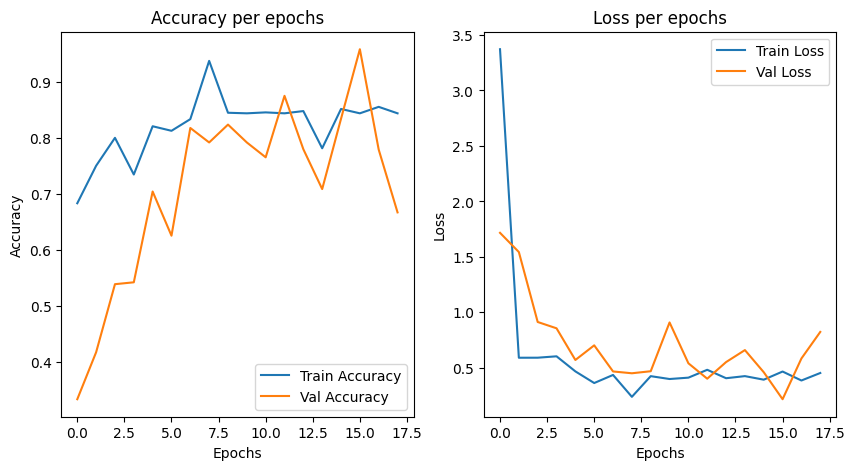

187/187 - 1s - 7ms/step - accuracy: 0.8438 - loss: 0.4535 - val_accuracy: 0.6667 - val_loss: 0.8237
Epoch 19/300


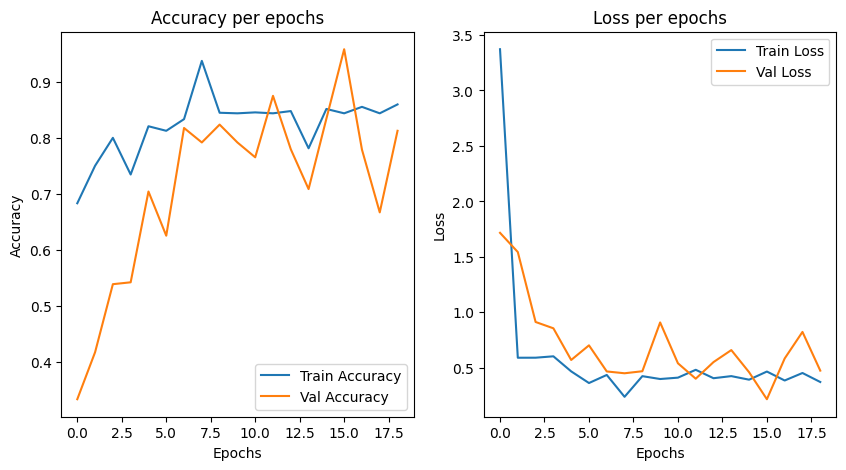

187/187 - 141s - 756ms/step - accuracy: 0.8597 - loss: 0.3723 - val_accuracy: 0.8125 - val_loss: 0.4749
Epoch 20/300


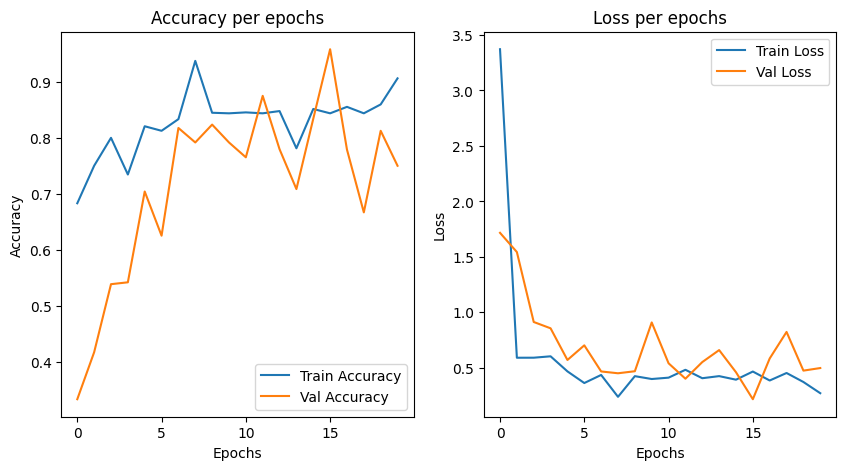

187/187 - 1s - 4ms/step - accuracy: 0.9062 - loss: 0.2714 - val_accuracy: 0.7500 - val_loss: 0.4981
Epoch 21/300


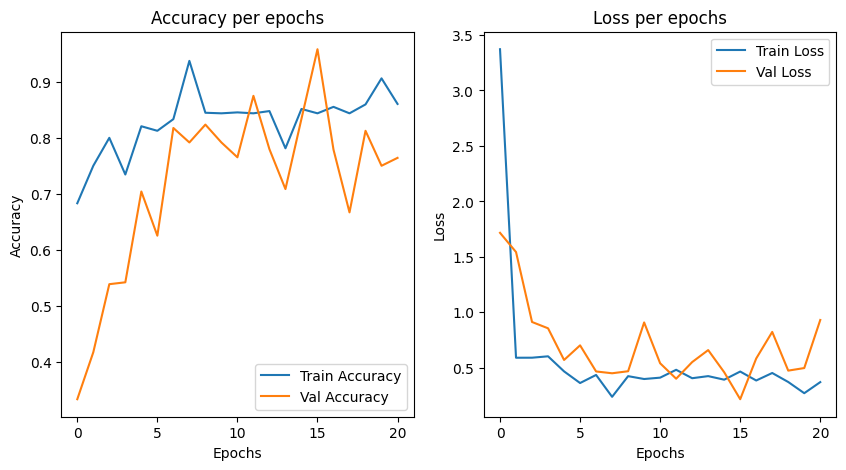

187/187 - 98s - 527ms/step - accuracy: 0.8605 - loss: 0.3713 - val_accuracy: 0.7641 - val_loss: 0.9314
Epoch 22/300


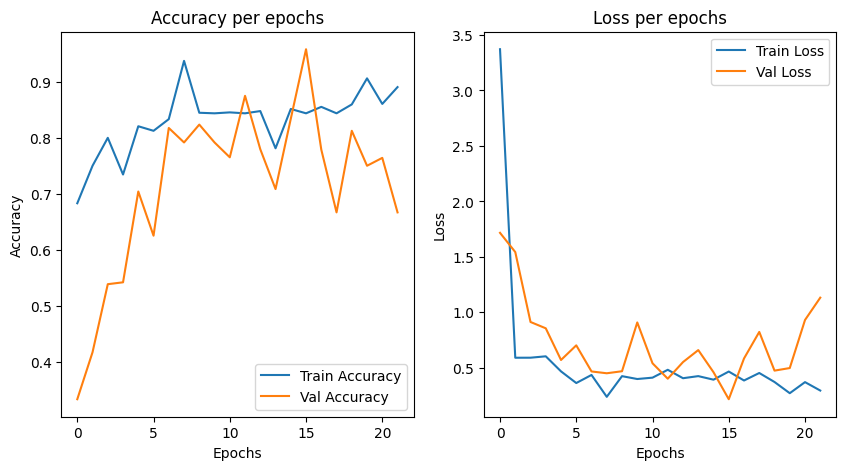

187/187 - 1s - 4ms/step - accuracy: 0.8906 - loss: 0.2953 - val_accuracy: 0.6667 - val_loss: 1.1325
Epoch 23/300


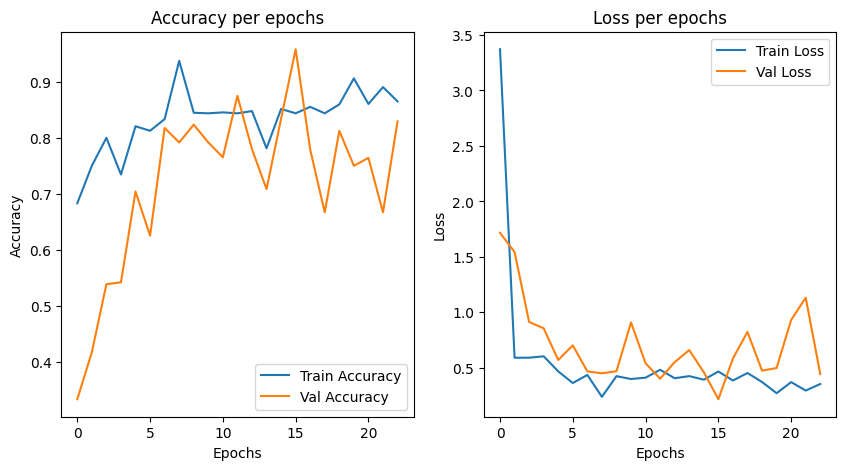

187/187 - 99s - 529ms/step - accuracy: 0.8651 - loss: 0.3543 - val_accuracy: 0.8293 - val_loss: 0.4434
Epoch 24/300


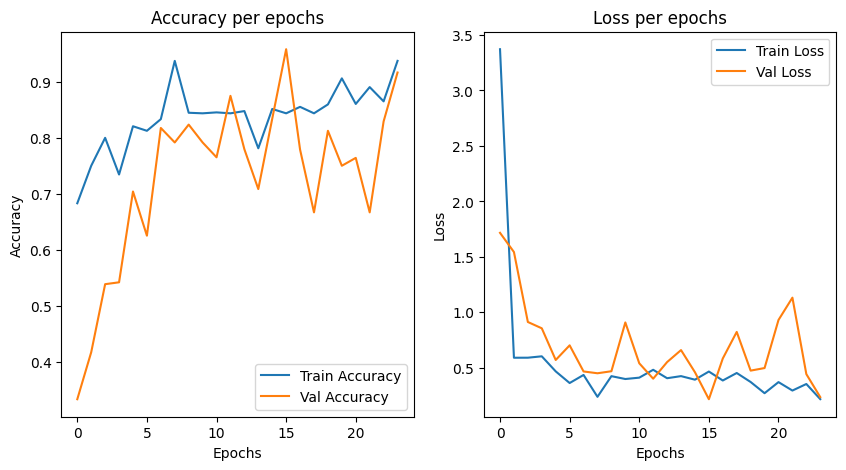

187/187 - 1s - 4ms/step - accuracy: 0.9375 - loss: 0.2178 - val_accuracy: 0.9167 - val_loss: 0.2361
Epoch 25/300


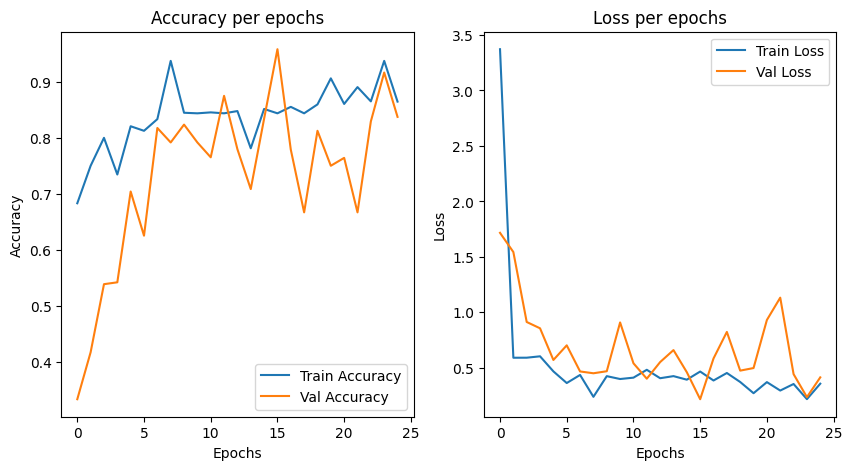

187/187 - 140s - 748ms/step - accuracy: 0.8647 - loss: 0.3572 - val_accuracy: 0.8374 - val_loss: 0.4141
Epoch 26/300


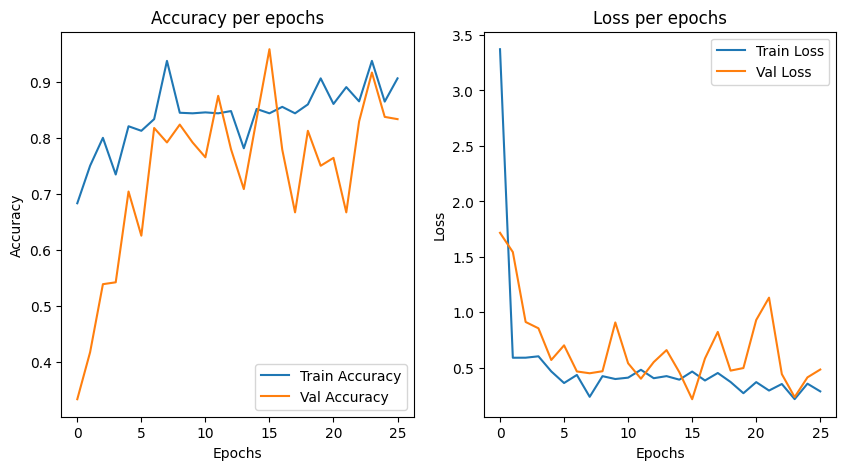

187/187 - 1s - 4ms/step - accuracy: 0.9062 - loss: 0.2879 - val_accuracy: 0.8333 - val_loss: 0.4848
Epoch 27/300


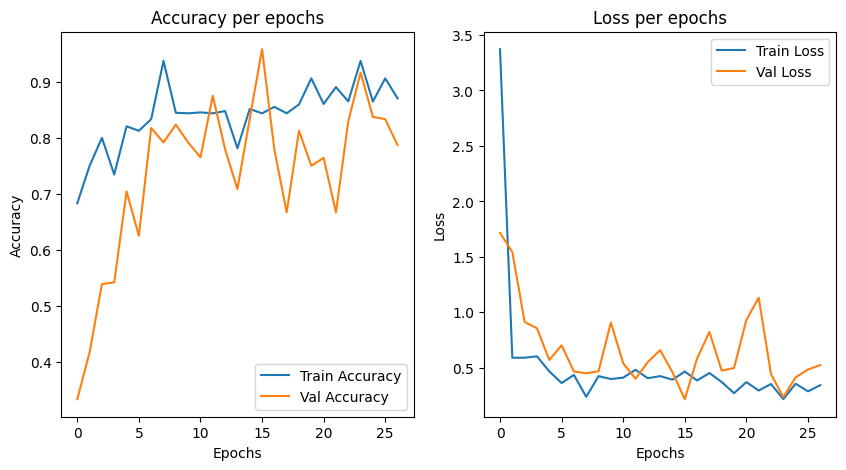

187/187 - 99s - 529ms/step - accuracy: 0.8706 - loss: 0.3438 - val_accuracy: 0.7870 - val_loss: 0.5247
Epoch 28/300


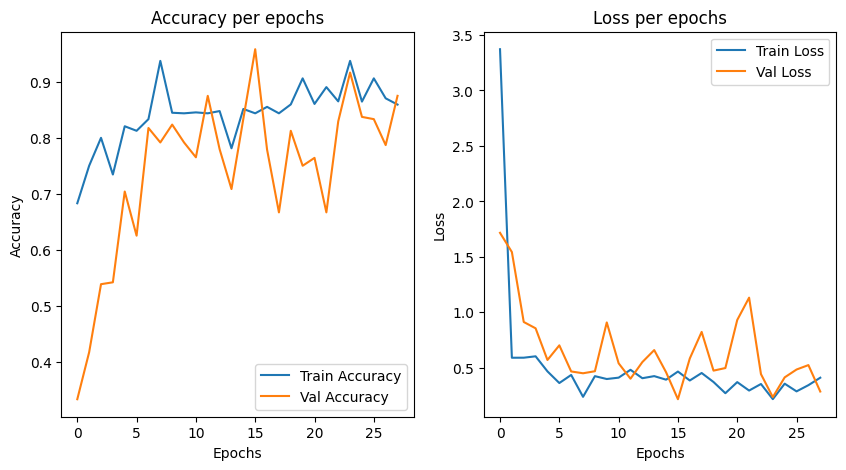

187/187 - 1s - 4ms/step - accuracy: 0.8594 - loss: 0.4110 - val_accuracy: 0.8750 - val_loss: 0.2865
Epoch 29/300


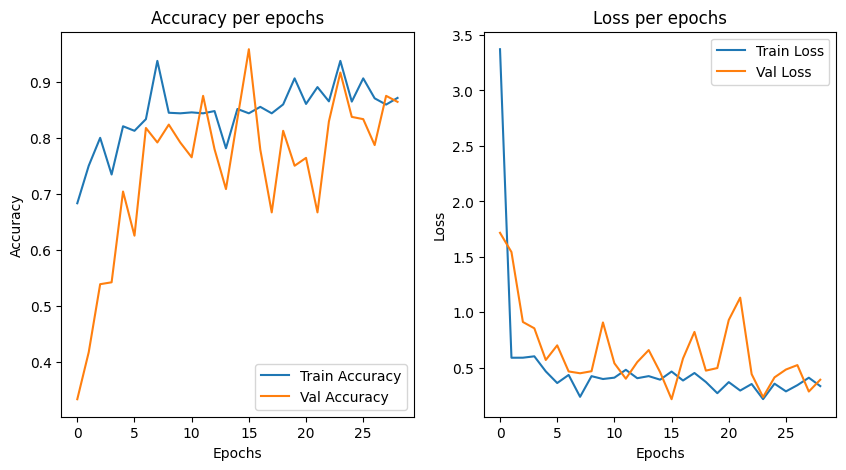

187/187 - 141s - 754ms/step - accuracy: 0.8713 - loss: 0.3353 - val_accuracy: 0.8642 - val_loss: 0.3928
Epoch 30/300


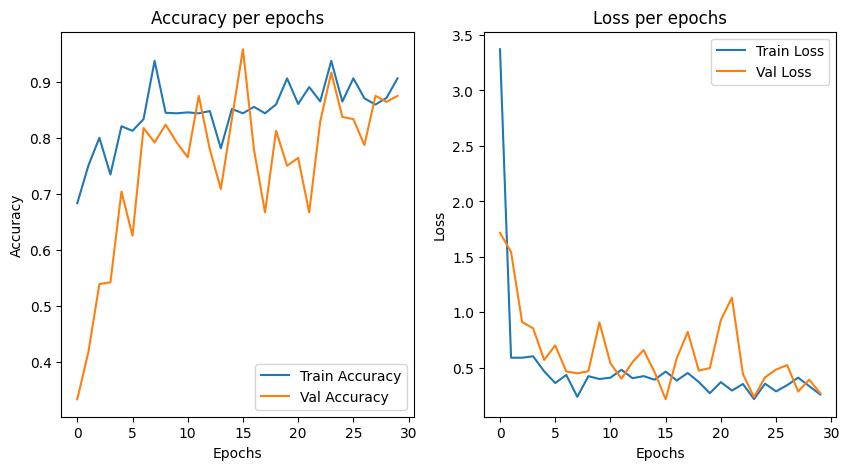

187/187 - 1s - 4ms/step - accuracy: 0.9062 - loss: 0.2594 - val_accuracy: 0.8750 - val_loss: 0.2709
Epoch 31/300


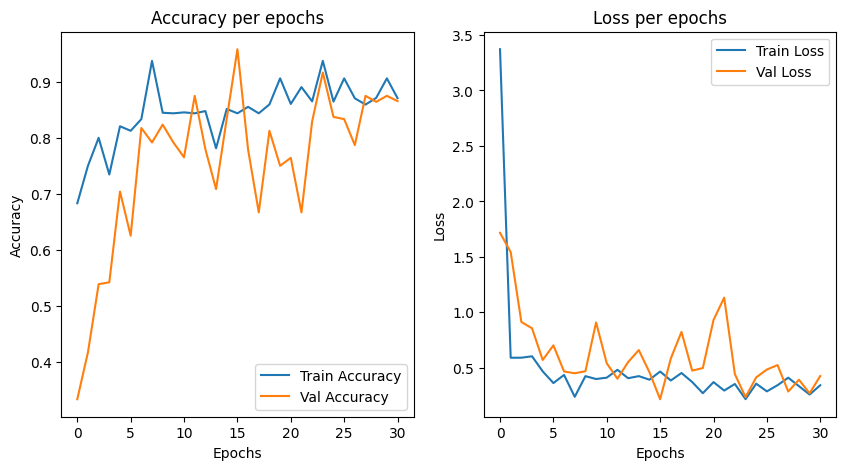

187/187 - 140s - 750ms/step - accuracy: 0.8709 - loss: 0.3432 - val_accuracy: 0.8656 - val_loss: 0.4266
Epoch 32/300


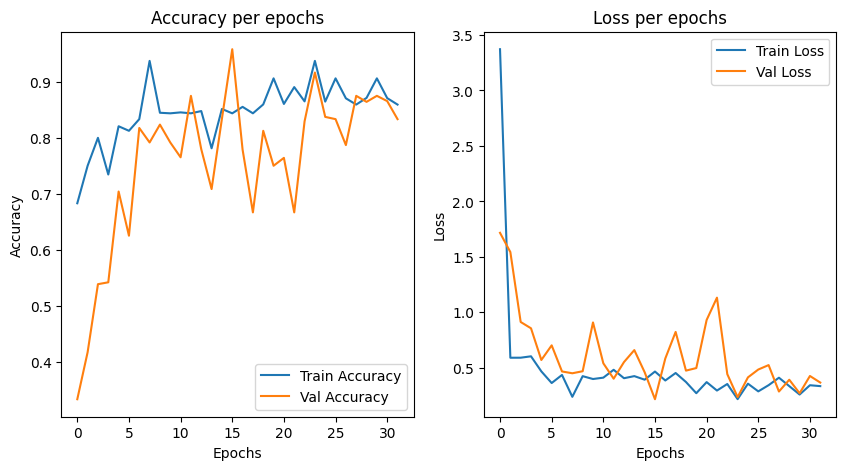

187/187 - 1s - 4ms/step - accuracy: 0.8594 - loss: 0.3352 - val_accuracy: 0.8333 - val_loss: 0.3673
Epoch 33/300


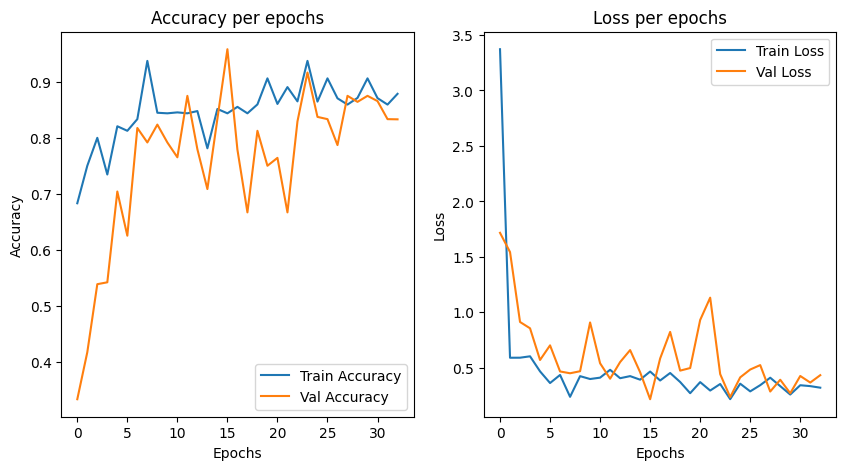

187/187 - 142s - 760ms/step - accuracy: 0.8786 - loss: 0.3211 - val_accuracy: 0.8330 - val_loss: 0.4338
Epoch 34/300


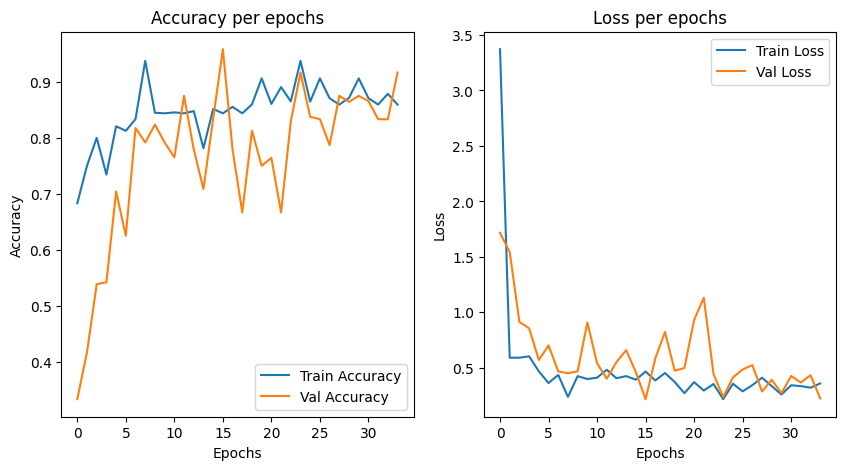

187/187 - 3s - 18ms/step - accuracy: 0.8594 - loss: 0.3593 - val_accuracy: 0.9167 - val_loss: 0.2236
Epoch 35/300


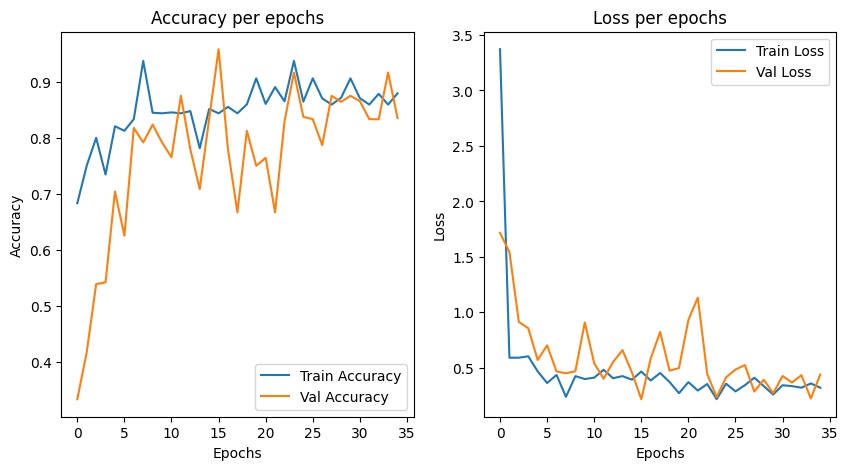

187/187 - 140s - 750ms/step - accuracy: 0.8794 - loss: 0.3205 - val_accuracy: 0.8353 - val_loss: 0.4396
Epoch 36/300


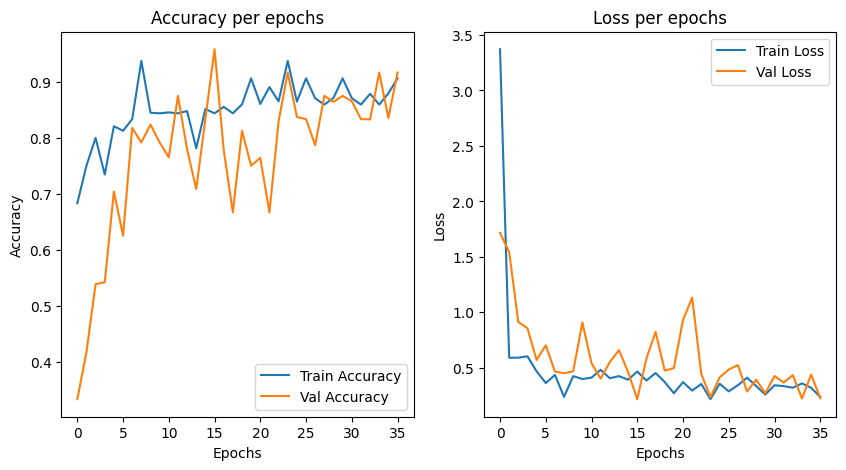

187/187 - 1s - 4ms/step - accuracy: 0.9062 - loss: 0.2370 - val_accuracy: 0.9167 - val_loss: 0.2259
Epoch 37/300


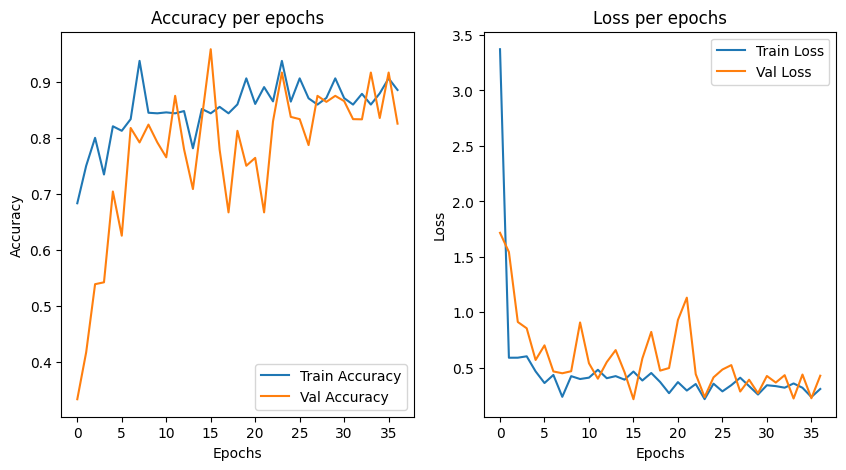

187/187 - 139s - 743ms/step - accuracy: 0.8855 - loss: 0.3096 - val_accuracy: 0.8253 - val_loss: 0.4291
Epoch 38/300


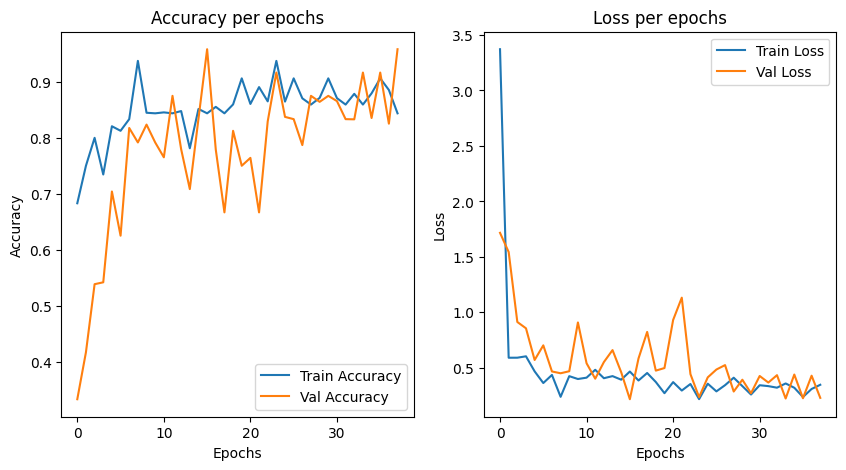

187/187 - 1s - 4ms/step - accuracy: 0.8438 - loss: 0.3473 - val_accuracy: 0.9583 - val_loss: 0.2293
Epoch 39/300


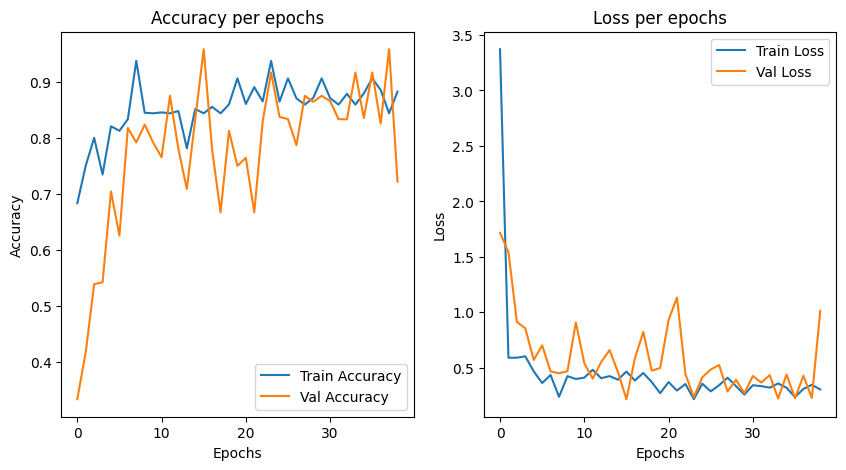

187/187 - 141s - 754ms/step - accuracy: 0.8826 - loss: 0.3052 - val_accuracy: 0.7214 - val_loss: 1.0134
Epoch 40/300


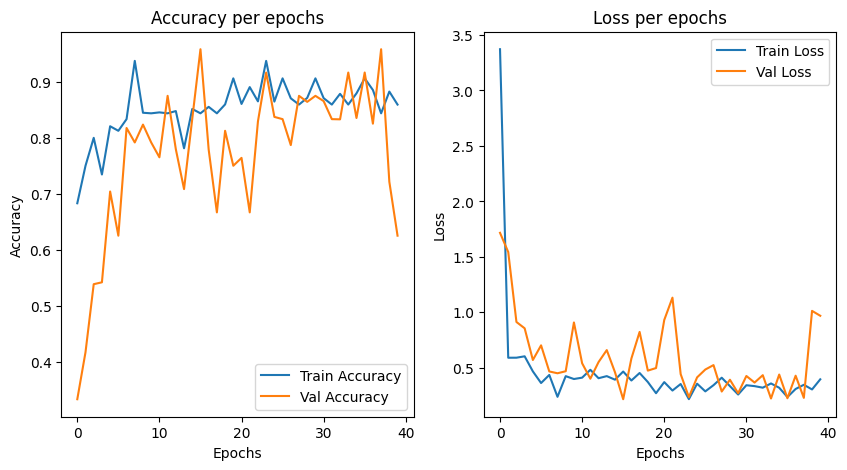

187/187 - 1s - 4ms/step - accuracy: 0.8594 - loss: 0.3966 - val_accuracy: 0.6250 - val_loss: 0.9693
Epoch 41/300


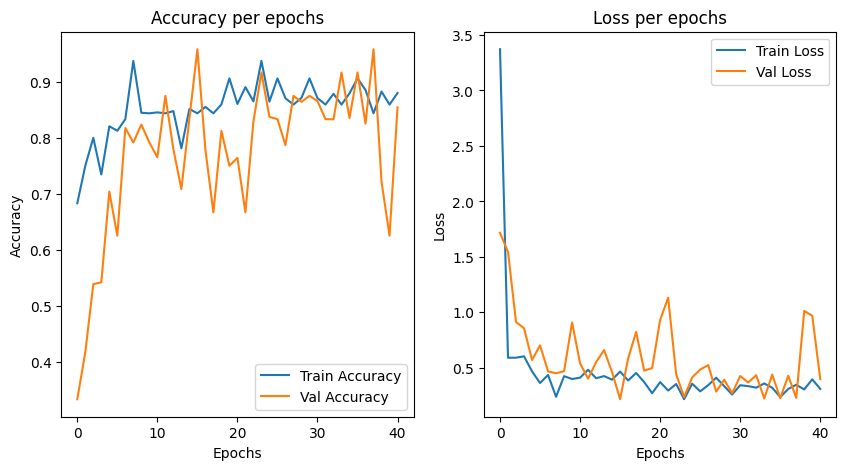

187/187 - 100s - 535ms/step - accuracy: 0.8800 - loss: 0.3101 - val_accuracy: 0.8545 - val_loss: 0.3983
Epoch 42/300


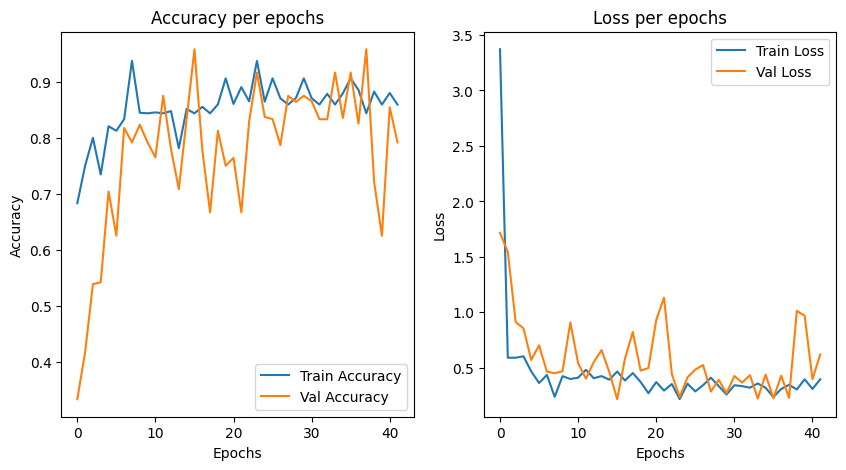

187/187 - 1s - 5ms/step - accuracy: 0.8594 - loss: 0.3963 - val_accuracy: 0.7917 - val_loss: 0.6208
Epoch 43/300


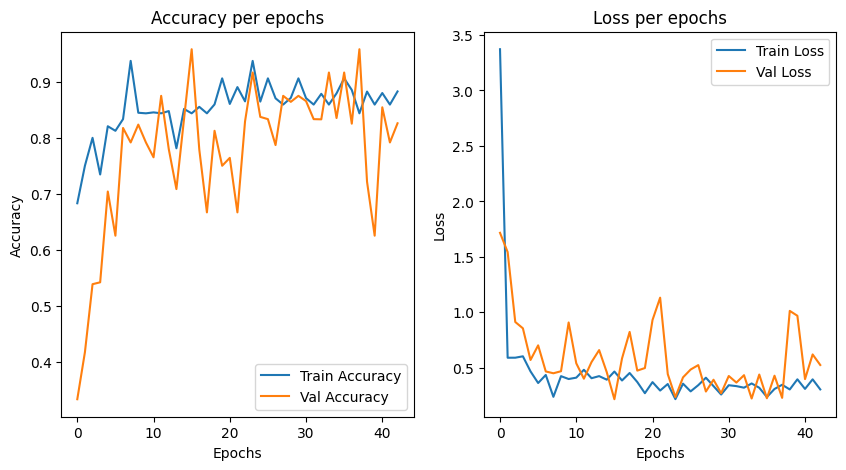

187/187 - 140s - 751ms/step - accuracy: 0.8829 - loss: 0.3055 - val_accuracy: 0.8259 - val_loss: 0.5255
Epoch 44/300


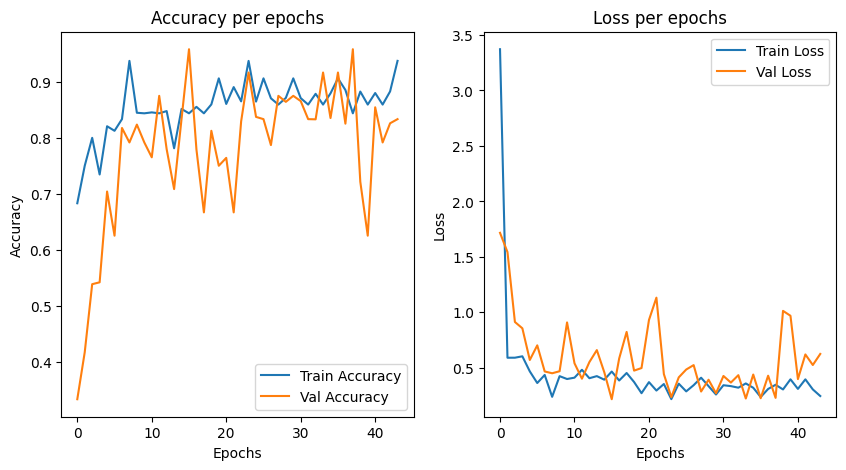

187/187 - 1s - 4ms/step - accuracy: 0.9375 - loss: 0.2459 - val_accuracy: 0.8333 - val_loss: 0.6253
Epoch 45/300


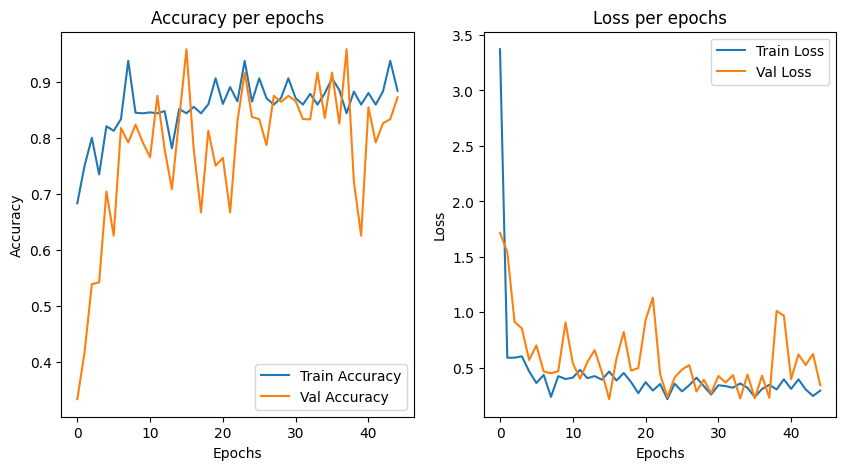

187/187 - 141s - 752ms/step - accuracy: 0.8840 - loss: 0.2950 - val_accuracy: 0.8723 - val_loss: 0.3438
Epoch 46/300


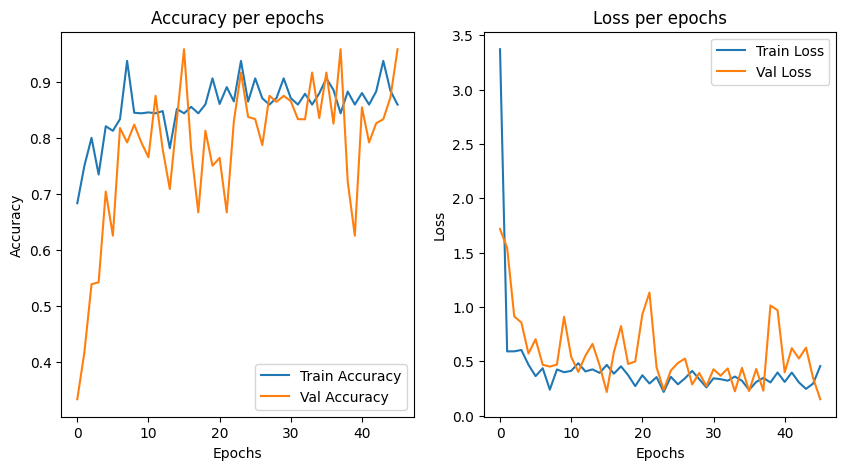

187/187 - 1s - 4ms/step - accuracy: 0.8594 - loss: 0.4557 - val_accuracy: 0.9583 - val_loss: 0.1507
Epoch 47/300


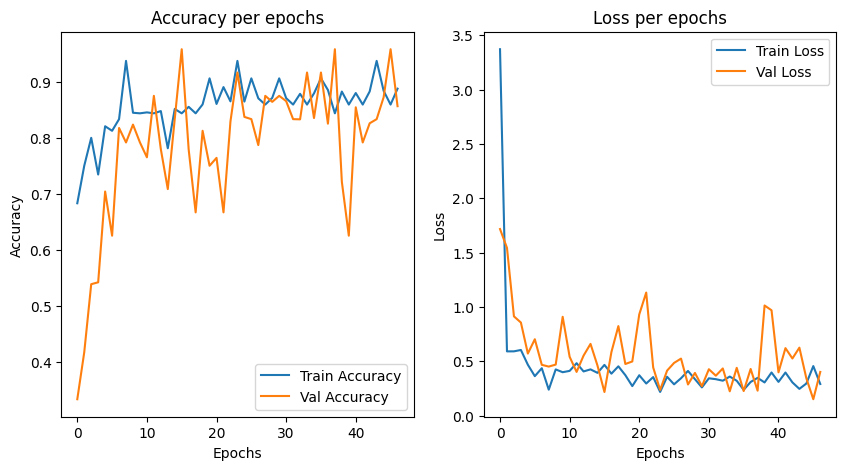

187/187 - 99s - 530ms/step - accuracy: 0.8878 - loss: 0.2907 - val_accuracy: 0.8565 - val_loss: 0.4018
Epoch 48/300


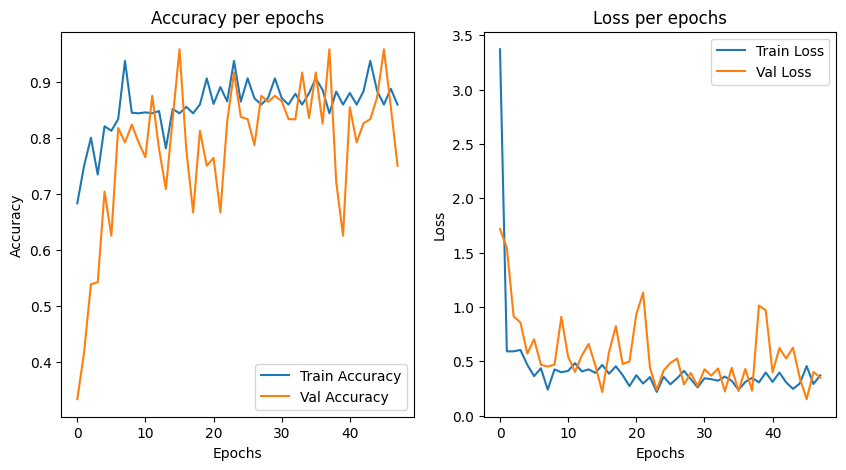

187/187 - 4s - 19ms/step - accuracy: 0.8594 - loss: 0.3706 - val_accuracy: 0.7500 - val_loss: 0.3491
Epoch 49/300


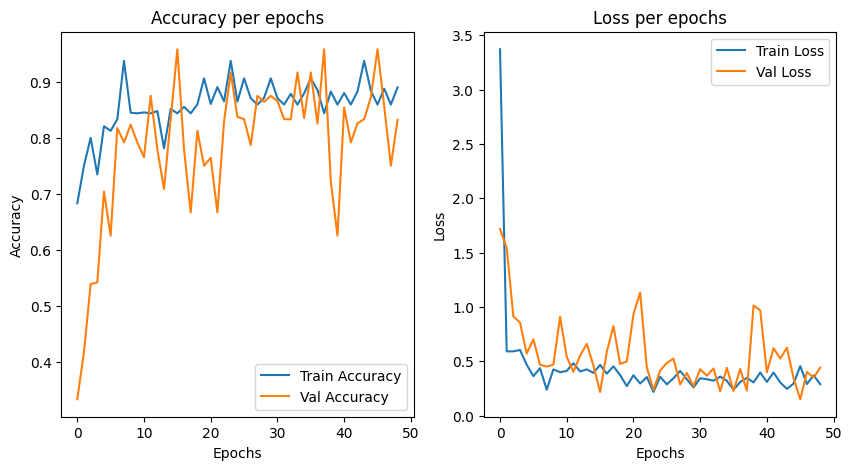

187/187 - 99s - 527ms/step - accuracy: 0.8901 - loss: 0.2886 - val_accuracy: 0.8320 - val_loss: 0.4419
Epoch 50/300


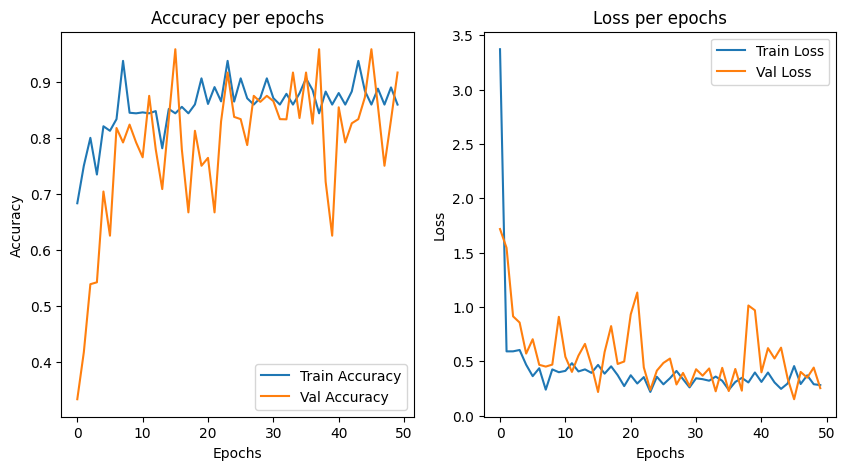

187/187 - 1s - 5ms/step - accuracy: 0.8594 - loss: 0.2809 - val_accuracy: 0.9167 - val_loss: 0.2525
Epoch 51/300


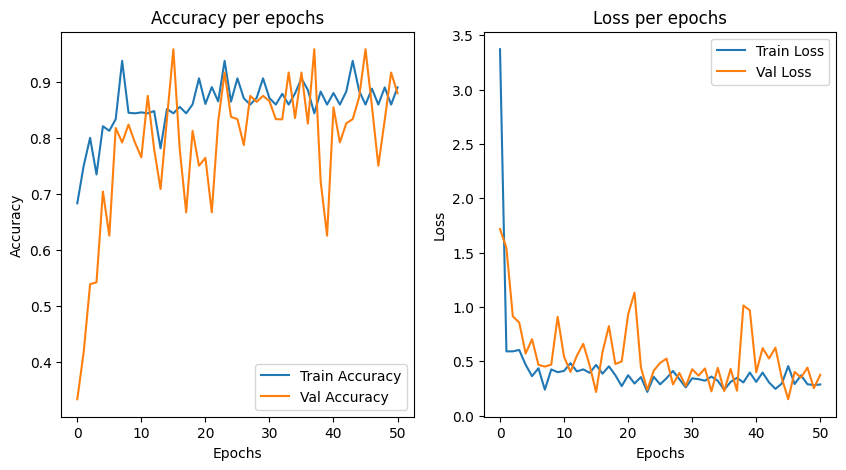

187/187 - 142s - 762ms/step - accuracy: 0.8902 - loss: 0.2863 - val_accuracy: 0.8797 - val_loss: 0.3754
Epoch 52/300


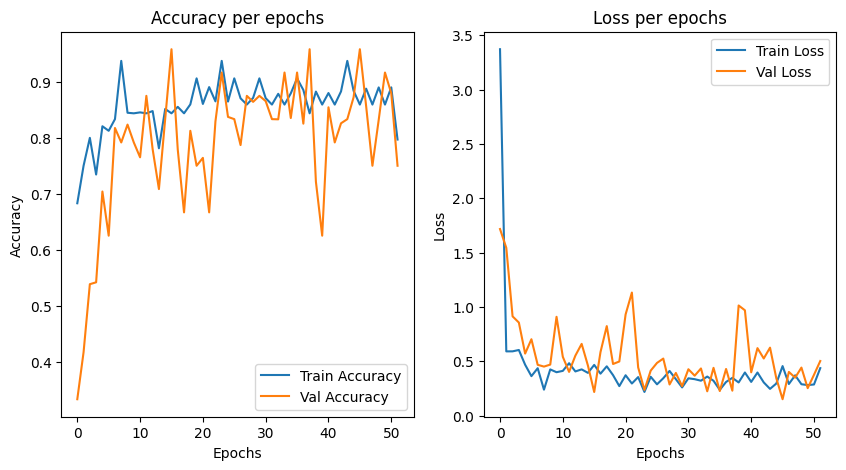

187/187 - 1s - 7ms/step - accuracy: 0.7969 - loss: 0.4369 - val_accuracy: 0.7500 - val_loss: 0.5023
Epoch 53/300


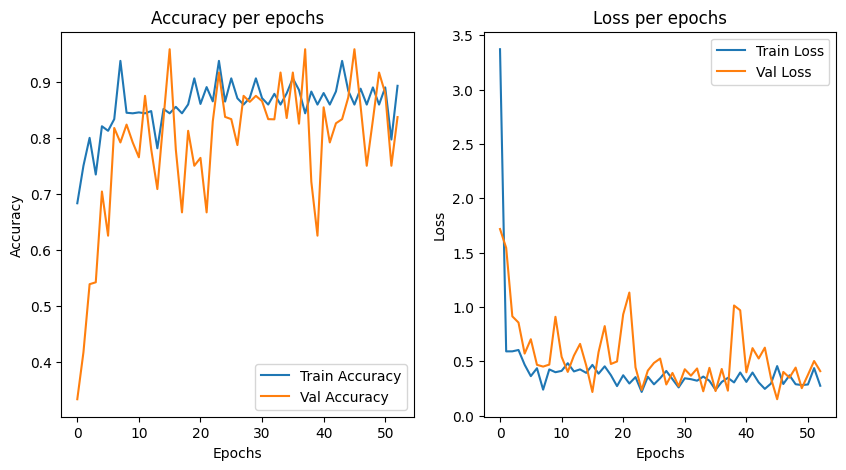

187/187 - 98s - 526ms/step - accuracy: 0.8929 - loss: 0.2745 - val_accuracy: 0.8370 - val_loss: 0.4091
Epoch 54/300


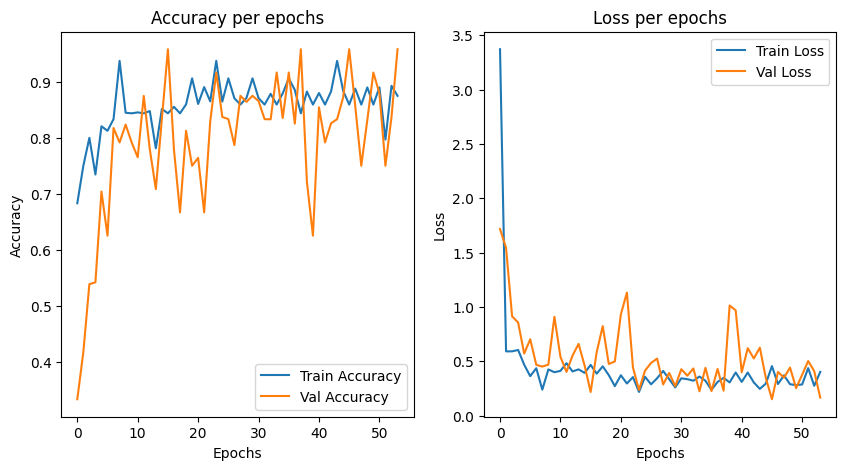

187/187 - 1s - 4ms/step - accuracy: 0.8750 - loss: 0.4024 - val_accuracy: 0.9583 - val_loss: 0.1649
Epoch 55/300


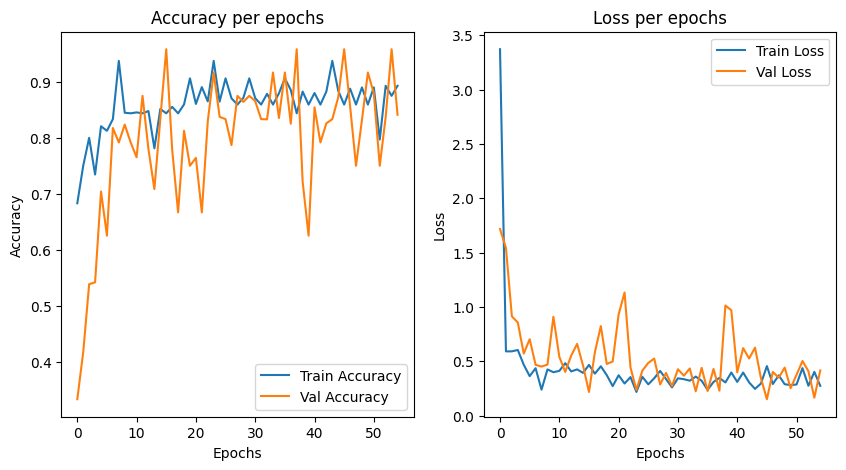

187/187 - 99s - 530ms/step - accuracy: 0.8929 - loss: 0.2737 - val_accuracy: 0.8411 - val_loss: 0.4152
Epoch 56/300


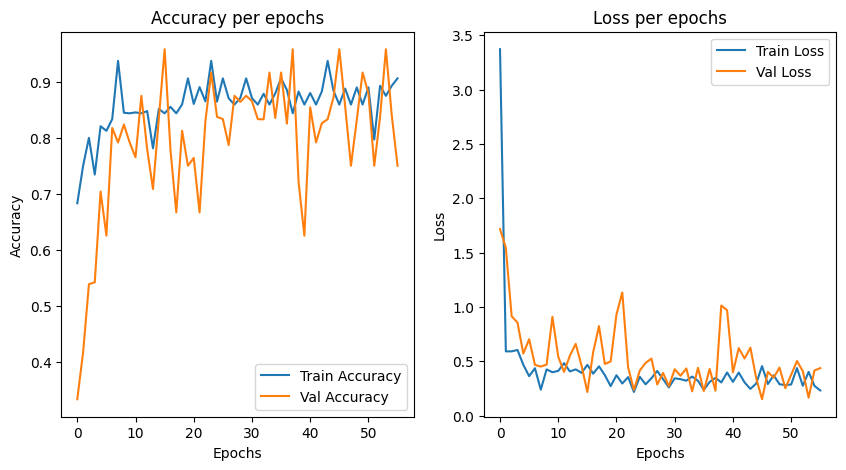

187/187 - 1s - 4ms/step - accuracy: 0.9062 - loss: 0.2311 - val_accuracy: 0.7500 - val_loss: 0.4368
Epoch 57/300


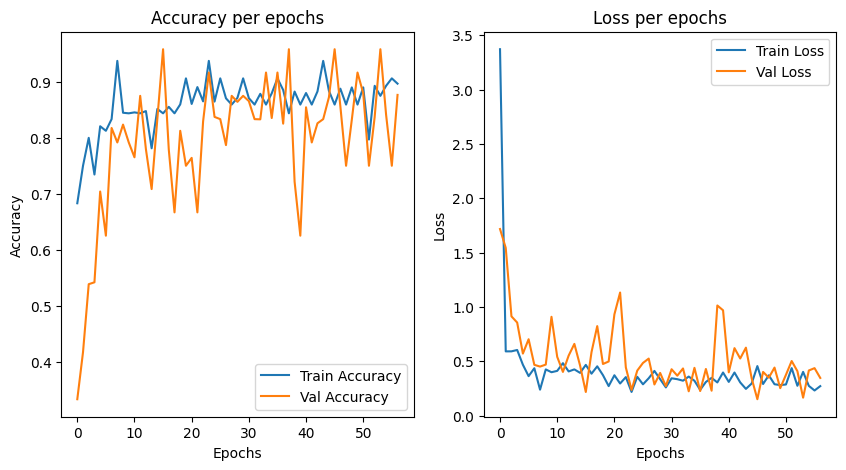

187/187 - 98s - 527ms/step - accuracy: 0.8968 - loss: 0.2712 - val_accuracy: 0.8767 - val_loss: 0.3466
Epoch 58/300


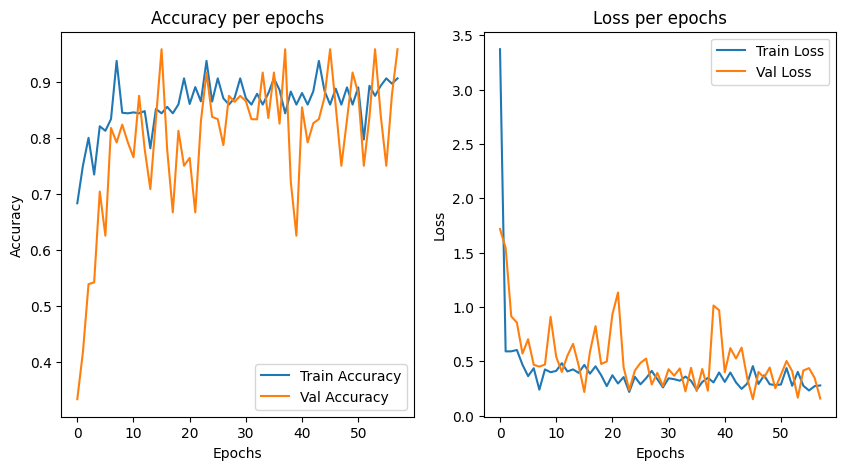

187/187 - 1s - 4ms/step - accuracy: 0.9062 - loss: 0.2776 - val_accuracy: 0.9583 - val_loss: 0.1568
Epoch 59/300


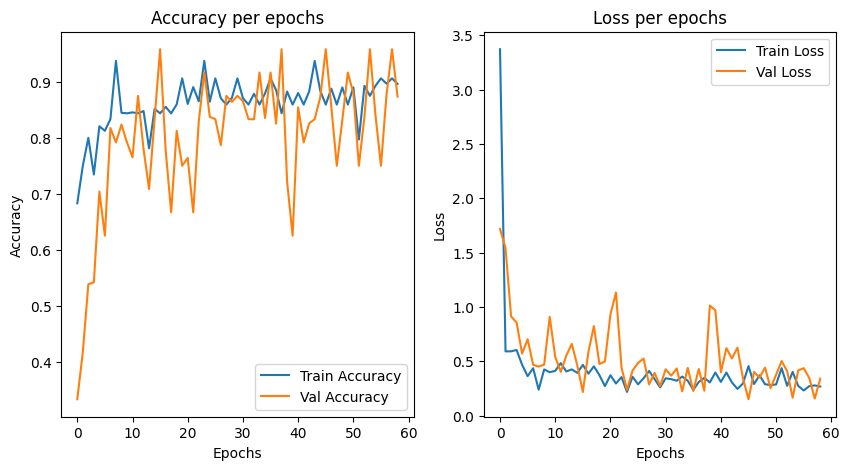

187/187 - 99s - 531ms/step - accuracy: 0.8964 - loss: 0.2675 - val_accuracy: 0.8737 - val_loss: 0.3401
Epoch 60/300


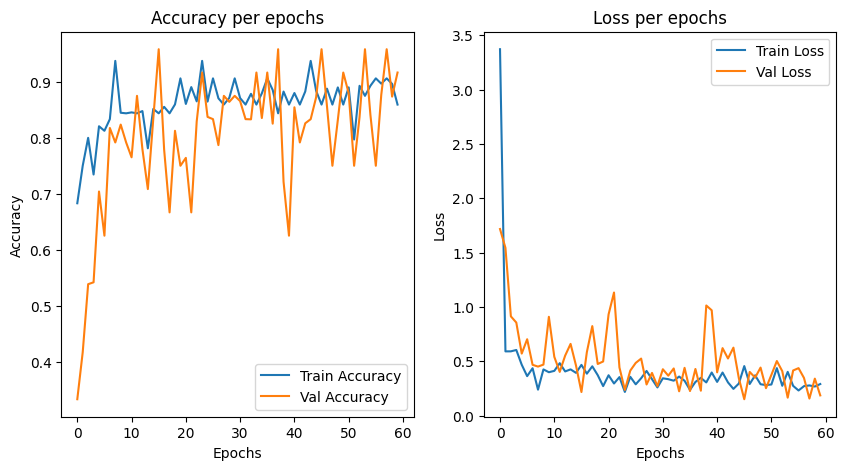

187/187 - 1s - 4ms/step - accuracy: 0.8594 - loss: 0.2905 - val_accuracy: 0.9167 - val_loss: 0.1860
Epoch 61/300


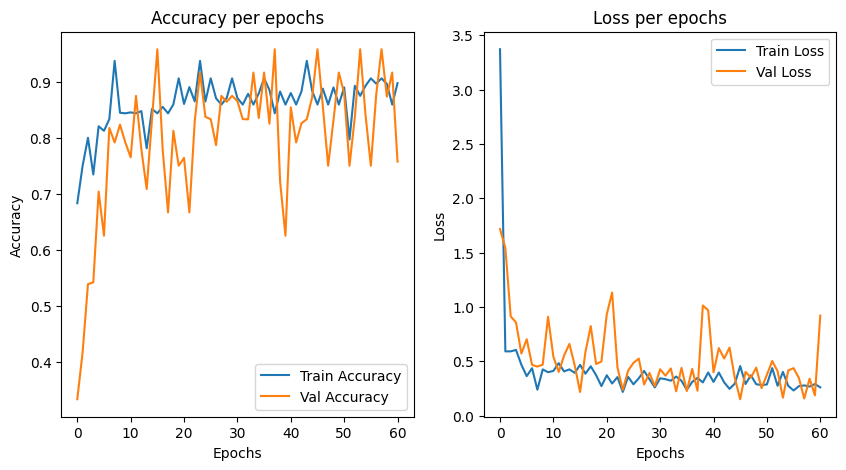

187/187 - 140s - 749ms/step - accuracy: 0.8976 - loss: 0.2599 - val_accuracy: 0.7574 - val_loss: 0.9206
Epoch 62/300


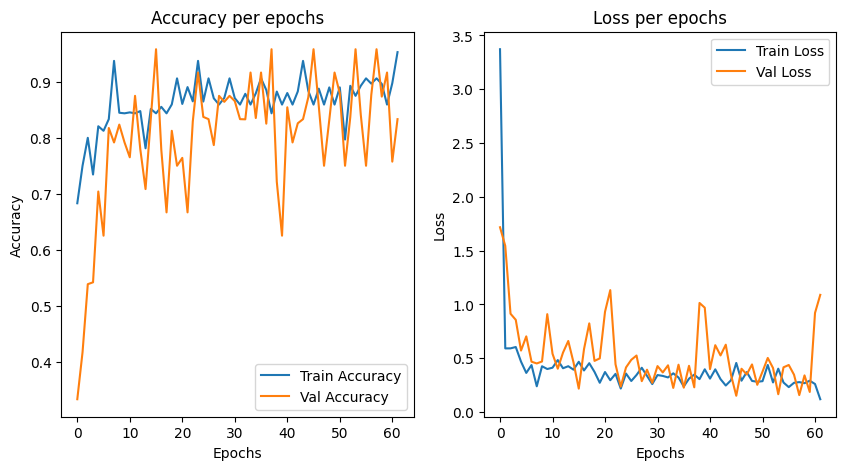

187/187 - 1s - 5ms/step - accuracy: 0.9531 - loss: 0.1186 - val_accuracy: 0.8333 - val_loss: 1.0886
Epoch 63/300


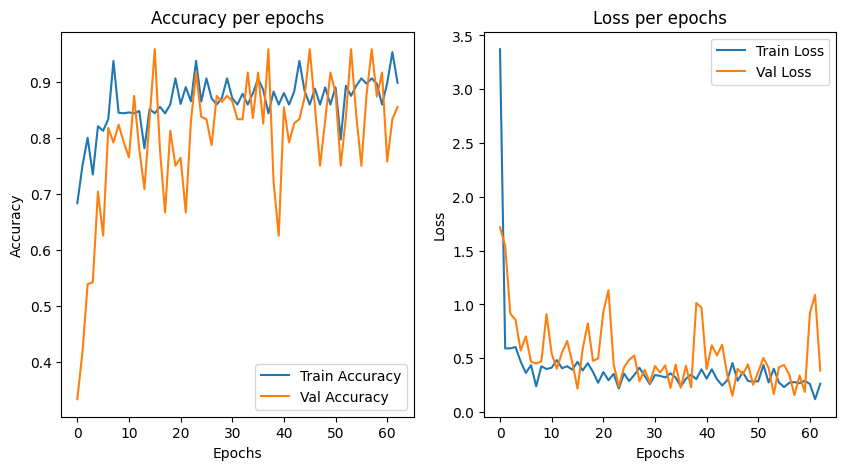

187/187 - 99s - 531ms/step - accuracy: 0.8984 - loss: 0.2629 - val_accuracy: 0.8552 - val_loss: 0.3841
Epoch 64/300


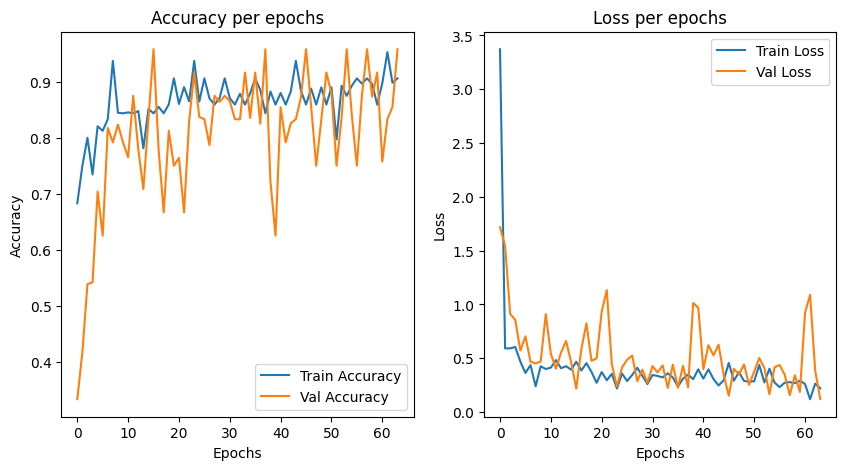

187/187 - 3s - 18ms/step - accuracy: 0.9062 - loss: 0.2203 - val_accuracy: 0.9583 - val_loss: 0.1207
Epoch 65/300


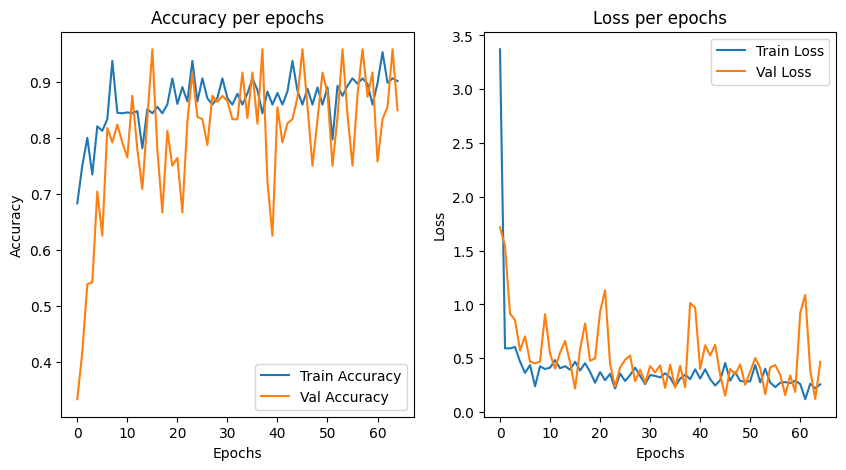

187/187 - 98s - 527ms/step - accuracy: 0.9013 - loss: 0.2569 - val_accuracy: 0.8491 - val_loss: 0.4653
Epoch 66/300


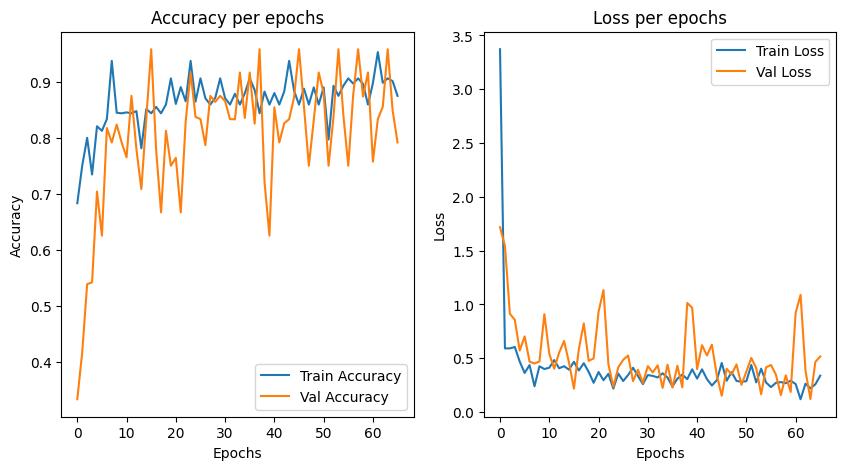

187/187 - 1s - 4ms/step - accuracy: 0.8750 - loss: 0.3374 - val_accuracy: 0.7917 - val_loss: 0.5159
Epoch 67/300


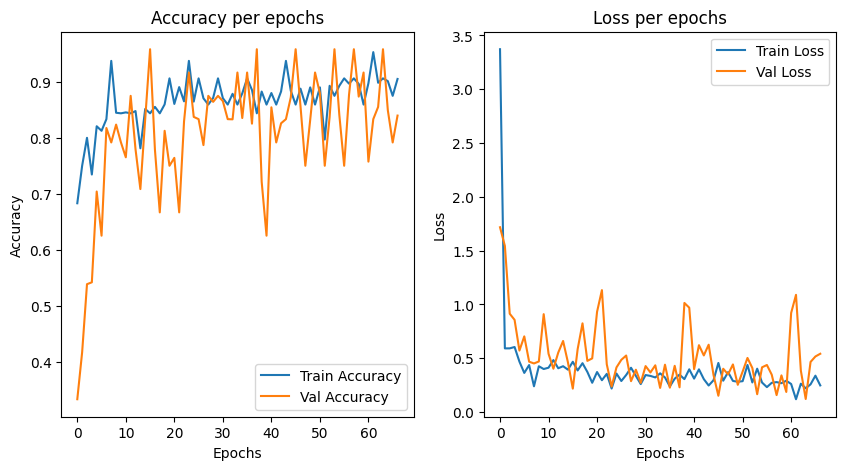

187/187 - 98s - 526ms/step - accuracy: 0.9052 - loss: 0.2470 - val_accuracy: 0.8397 - val_loss: 0.5411
Epoch 68/300


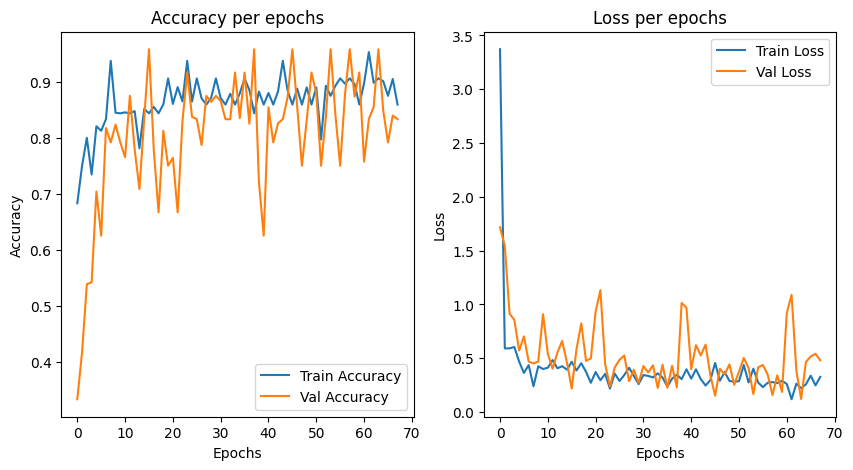

187/187 - 4s - 20ms/step - accuracy: 0.8594 - loss: 0.3262 - val_accuracy: 0.8333 - val_loss: 0.4800
Epoch 69/300


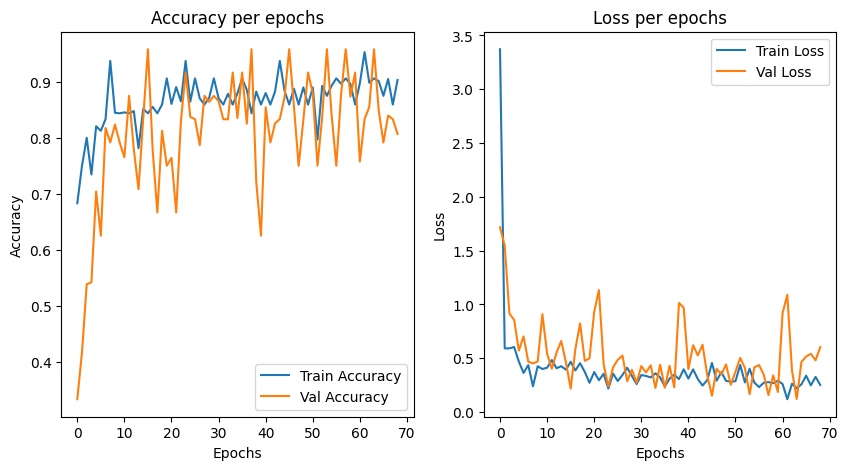

187/187 - 137s - 733ms/step - accuracy: 0.9032 - loss: 0.2511 - val_accuracy: 0.8068 - val_loss: 0.6022
Epoch 70/300
The model has achieved 95% accuracy and validation accuracy.


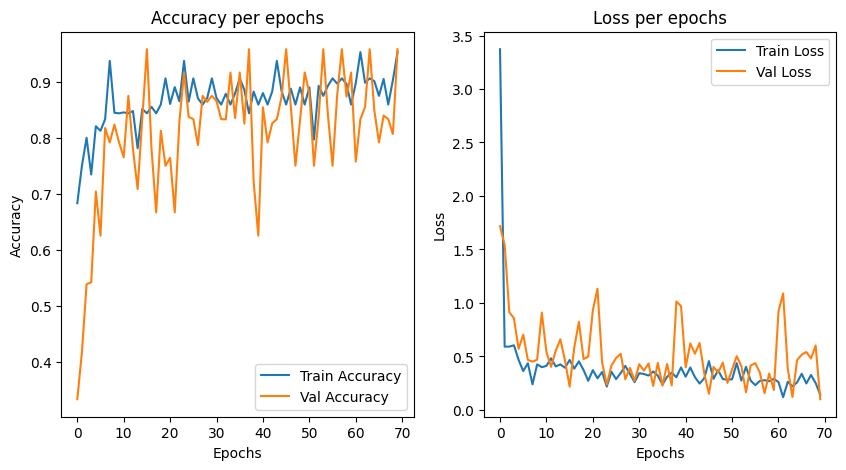

187/187 - 1s - 5ms/step - accuracy: 0.9531 - loss: 0.1418 - val_accuracy: 0.9583 - val_loss: 0.0996


In [ ]:
history = model.fit(train_gen,
                    epochs=300,
                    validation_data=val_gen,
                    steps_per_epoch=187,
                    validation_steps=93,
                    callbacks=[Model_Accuracy_checker_obj, plot_obj],
                    verbose=2)

Berdasarkan kode diatas:

**Memenuhi Saran ke-4** >> Akurasi pada training set dan validation set minimal 95%

In [ ]:
model.export('saved-model-tf/', format="tf_saved_model")

Saved artifact at 'saved-model-tf/'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  132138989275792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132138989279664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132138989277552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132138989281600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132138989274912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132138989278256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132138989283712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132138989286000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132138989278080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132138989286528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132138989281248

In [ ]:
model.save("model.h5")

In [ ]:
# Install tensorflowjs
!pip install tensorflowjs

# Convert model.h5 to model
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 114.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
2024-09-18 09:56:49.513008: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-18 09:56:49.532657: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-18 09:56:49.538669: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to re

In [ ]:
model_h5 = tf.keras.models.load_model('model.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model_h5)
tflite_model = converter.convert()

# Save the converted model to a .tflite file
with open('tflite_model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpch8dz8dc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  132136985168352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132137387925120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132137387931104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132137387921776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132137387924064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132137387930576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132135614753680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132135614742592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132135614744528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132135614755088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132135614744880

In [ ]:
%pip freeze > requirements.txt

In [ ]:
!zip -r /content/saved_model.zip /content/saved-model-tf

  adding: content/saved-model-tf/ (stored 0%)
  adding: content/saved-model-tf/variables/ (stored 0%)
  adding: content/saved-model-tf/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/saved-model-tf/variables/variables.index (deflated 71%)
  adding: content/saved-model-tf/assets/ (stored 0%)
  adding: content/saved-model-tf/saved_model.pb (deflated 88%)
  adding: content/saved-model-tf/fingerprint.pb (stored 0%)


In [ ]:
!zip -r /content/tfjs_model.zip /content/tfjs_model

  adding: content/tfjs_model/ (stored 0%)
  adding: content/tfjs_model/group1-shard21of88.bin (deflated 7%)
  adding: content/tfjs_model/group1-shard52of88.bin (deflated 7%)
  adding: content/tfjs_model/group1-shard59of88.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard48of88.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard88of88.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard4of88.bin (deflated 7%)
  adding: content/tfjs_model/group1-shard33of88.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard56of88.bin (deflated 7%)
  adding: content/tfjs_model/group1-shard87of88.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard20of88.bin (deflated 7%)
  adding: content/tfjs_model/group1-shard81of88.bin (deflated 7%)
  adding: content/tfjs_model/group1-shard24of88.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard51of88.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard28of88.bin (deflated 8%)
  adding: content/tfjs_model/group1

In [1]:
%pip install tensorflow==2.17.0
import tensorflow as tf

Note: you may need to restart the kernel to use updated packages.


In [2]:
def images_preprocessing(filename):
   
    image = tf.io.decode_image(open(filename, 'rb').read(), channels=3)
    image = tf.image.resize(image, [150, 150])
    image = image/255.
   
    image_tensor = tf.expand_dims(image, 0)
    image_tensor = image_tensor.numpy().tolist()
   
    return image_tensor
 
filename = 'images/forest.jpeg'
image_tensor = images_preprocessing(filename=filename)

In [3]:
json_data = {
    "instances": image_tensor
}

In [6]:
import requests

endpoint = "http://localhost:8501/v1/models/model:predict"
 
response = requests.post(endpoint, json=json_data)

prediction = tf.argmax(response.json()['predictions'][0]).numpy()

map_labels = {0: "Forest", 1: "Glacier", 2: "Mountain"}

print(f"Prediction: {map_labels[prediction]}")

Prediction: Forest


Berdasarkan kode diatas:

**Memenuhi Saran ke-6** >> Melakukan inference menggunakan salah satu model (TF-Lite, TFJS atau savedmodel dengan tf serving).